## Lead Scoring Case Study
With 40 predictor variables we need to predict whether a particular lead will be tagged as a hot lead or a cold lead. In makrketing terminology, this is referred to as lead conversion respectively. A hot lead is a lead who has been associated with a higher probability to convert as a sale and cold lead has been associated with a lower probability to convert as a sale.

### Step 1: Importing  Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing important libraries Pandas and NumPy matpotlib and seaborn
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step 2: Inspecting the Dataframe

#### Link to use relative path to input data set based on your directory structure:
https://stackoverflow.com/questions/50119792/python-import-excel-file-using-relative-path

In [3]:
# Importing all datasets
leads = pd.read_csv(r'./../data/raw/Leads.csv')
leads_orig=leads
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [6]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
print(leads.columns.tolist())

['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


### Step 3: Data Cleaning 

In [8]:
# Print the null percentage of each column of dataframe 'leads'.
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
Lead Quality                                                                    Lead Quality   
Asymmetrique Activity Index                                      Asymmetrique Activity Index   
Asymmetrique Profile Score                                        Asymmetrique Profile Score   
Asymmetrique Activity Score                                      Asymmetrique Activity Score   
Asymmetrique Profile Index                                        Asymmetrique Profile Index   
Tags                                                                                    Tags   
Lead Profile                                                                    Lead Profile   
What matters most to you in choosing a course  What matters most to you in choosing a course   
What is your current occupation                              What is your current occupation   
Country                                                                              Country   
How did you hear about X Education                        How did you hear about X Education   
Specialization                                                                Specialization   
City                                                                                    City   
Page Views Per Visit                                                    Page Views Per Visit   
TotalVisits                                                                      TotalVisits   
Last Activity                                                                  Last Activity   
Lead Source                                                                      Lead Source   
Receive More Updates About Our Courses                Receive More Updates About Our Courses   
I agree to pay the amount through cheque            I agree to pay the amount through cheque   
Get updates on DM Content                                          Get updates on DM Content   
Update me on Supply Chain Content                          Update me on Supply Chain Content   
A free copy of Mastering The Interview                A free copy of Mastering The Interview   
Prospect ID                                                                      Prospect ID   
Newspaper Article                                                          Newspaper Article   
Through Recommendations                                              Through Recommendations   
Digital Advertisement                                                  Digital Advertisement   
Newspaper                                                                          Newspaper   
X Education Forums                                                        X Education Forums   
Lead Number                                                                      Lead Number   
Magazine                                                                            Magazine   
Search                                                                                Search   
Total Time Spent on Website                                      Total Time Spent on Website   
Converted                                                                          Converted   
Do Not Call                                                                      Do Not Call   
Do Not Email                                                                    Do Not Email   
Lead Origin                                                                      Lead Origin   
Last Notable Activity                                                  Last Notable Activity   

                                               No of Nulls  percent_missing  
Lead Quality                                          4767        51.590909  
Asymmetrique Activity Index                           4218        45.649351  
Asymmetrique Profile Score                            4218        45.649351  
Asymmetrique Activity Score                           4218        45.649351  
Asymmetrique Profile Index                

In [9]:
#37 columns
missing_value_df.shape

(37, 3)

In [10]:
#Replace "Select" values with nan in many categorical variables
leads=leads.replace('Select', np.NaN)

In [11]:
# Print the null percentage of each column of dataframe 'leads'.
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
How did you hear about X Education                        How did you hear about X Education   
Lead Profile                                                                    Lead Profile   
Lead Quality                                                                    Lead Quality   
Asymmetrique Profile Score                                        Asymmetrique Profile Score   
Asymmetrique Activity Score                                      Asymmetrique Activity Score   
Asymmetrique Activity Index                                      Asymmetrique Activity Index   
Asymmetrique Profile Index                                        Asymmetrique Profile Index   
City                                                                                    City   
Specialization                                                                Specialization   
Tags                                                                                    Tags   
What matters most to you in choosing a course  What matters most to you in choosing a course   
What is your current occupation                              What is your current occupation   
Country                                                                              Country   
Page Views Per Visit                                                    Page Views Per Visit   
TotalVisits                                                                      TotalVisits   
Last Activity                                                                  Last Activity   
Lead Source                                                                      Lead Source   
Receive More Updates About Our Courses                Receive More Updates About Our Courses   
I agree to pay the amount through cheque            I agree to pay the amount through cheque   
Get updates on DM Content                                          Get updates on DM Content   
Update me on Supply Chain Content                          Update me on Supply Chain Content   
A free copy of Mastering The Interview                A free copy of Mastering The Interview   
Prospect ID                                                                      Prospect ID   
Newspaper Article                                                          Newspaper Article   
Through Recommendations                                              Through Recommendations   
Digital Advertisement                                                  Digital Advertisement   
Newspaper                                                                          Newspaper   
X Education Forums                                                        X Education Forums   
Lead Number                                                                      Lead Number   
Magazine                                                                            Magazine   
Search                                                                                Search   
Total Time Spent on Website                                      Total Time Spent on Website   
Converted                                                                          Converted   
Do Not Call                                                                      Do Not Call   
Do Not Email                                                                    Do Not Email   
Lead Origin                                                                      Lead Origin   
Last Notable Activity                                                  Last Notable Activity   

                                               No of Nulls  percent_missing  
How did you hear about X Education                    7250        78.463203  
Lead Profile                                          6855        74.188312  
Lead Quality                                          4767        51.590909  
Asymmetrique Profile Score                            4218        45.649351  
Asymmetrique Activity Score               

In [12]:
#Obtain records(dataframe) columns which have greater than or equal to 40% null values and drop them for further analysis.
missing_value_40_df=missing_value_df[missing_value_df.percent_missing>=40]
missing_value_40_df

column_name  \
How did you hear about X Education  How did you hear about X Education   
Lead Profile                                              Lead Profile   
Lead Quality                                              Lead Quality   
Asymmetrique Profile Score                  Asymmetrique Profile Score   
Asymmetrique Activity Score                Asymmetrique Activity Score   
Asymmetrique Activity Index                Asymmetrique Activity Index   
Asymmetrique Profile Index                  Asymmetrique Profile Index   

                                    No of Nulls  percent_missing  
How did you hear about X Education         7250        78.463203  
Lead Profile                               6855        74.188312  
Lead Quality                               4767        51.590909  
Asymmetrique Profile Score                 4218        45.649351  
Asymmetrique Activity Score                4218        45.649351  
Asymmetrique Activity Index                4218        45.649351  
Asymmetrique Profile Index                 4218        45.649351

In [13]:
# no of columns to be dropped.
missing_value_40_df.shape

(7, 3)

In [14]:
#No of columns before dropping columns
leads.shape

(9240, 37)

In [15]:
#Code to drop columns which have missing percentage greater than or equal to 40%
toRemove = set()
percent_missing = (leads.isnull().sum() * 100 / len(leads) )
for i in percent_missing.index:
    if(percent_missing[i]>=40):
         toRemove.add(i)
for i in toRemove:
    leads.drop(i, axis=1, inplace=True)

In [16]:
#No of columns after dropping columns:Note the no of columns reduce from 37 to 30
leads.shape

(9240, 30)

In [17]:
# Checking percentage of missing values after removing the missing values >40%
# round(100*(leads.isnull().sum()/len(leads.index)), 2)
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
City                                                                                    City   
Specialization                                                                Specialization   
Tags                                                                                    Tags   
What matters most to you in choosing a course  What matters most to you in choosing a course   
What is your current occupation                              What is your current occupation   
Country                                                                              Country   
Page Views Per Visit                                                    Page Views Per Visit   
TotalVisits                                                                      TotalVisits   
Last Activity                                                                  Last Activity   
Lead Source                                                                      Lead Source   
Through Recommendations                                              Through Recommendations   
Receive More Updates About Our Courses                Receive More Updates About Our Courses   
Prospect ID                                                                      Prospect ID   
Newspaper                                                                          Newspaper   
Update me on Supply Chain Content                          Update me on Supply Chain Content   
Get updates on DM Content                                          Get updates on DM Content   
I agree to pay the amount through cheque            I agree to pay the amount through cheque   
A free copy of Mastering The Interview                A free copy of Mastering The Interview   
Digital Advertisement                                                  Digital Advertisement   
Search                                                                                Search   
X Education Forums                                                        X Education Forums   
Newspaper Article                                                          Newspaper Article   
Magazine                                                                            Magazine   
Lead Number                                                                      Lead Number   
Total Time Spent on Website                                      Total Time Spent on Website   
Converted                                                                          Converted   
Do Not Call                                                                      Do Not Call   
Do Not Email                                                                    Do Not Email   
Lead Origin                                                                      Lead Origin   
Last Notable Activity                                                  Last Notable Activity   

                                               No of Nulls  percent_missing  
City                                                  3669        39.707792  
Specialization                                        3380        36.580087  
Tags                                                  3353        36.287879  
What matters most to you in choosing a course         2709        29.318182  
What is your current occupation                       2690        29.112554  
Country                                               2461        26.634199  
Page Views Per Visit                                   137         1.482684  
TotalVisits                                            137         1.482684  
Last Activity                                          103         1.114719  
Lead Source                                             36         0.389610  
Through Recommendations                                  0         0.000000  
Receive More Updates About Our Courses                   0         0.000000  
Prospect ID                                              0         0.000000  
Newspaper   

### Drop columns which are generated by Sales Team: 
Reason: As we don't have these variables and even if we get them later, are model and predictions should be independent of these variables.

In [18]:
print(leads.columns.tolist())

['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [19]:
#shape before dropping sales team generated columns:30 columns
leads.shape

(9240, 30)

In [20]:
sales_team_cols=['Tags','Lead Quality', 'Asymmetrique Activity Index','Asymmetrique Profile Score', 'Asymmetrique Activity Score','Asymmetrique Profile Index', 'Last Activity','Last Notable Activity','Lead Profile']
sales_team_cols_subset=['Tags','Last Activity','Last Notable Activity']

In [21]:
for i in sales_team_cols_subset:
    leads.drop(i, axis=1, inplace=True)

In [22]:
#shape after dropping sales team generated columns: 27 columns
leads.shape

(9240, 27)

### Brief Outlier Analysis:

In [23]:
# Find columns with numeric dtypes and store in variable which is a column list, used to subset and get a new dataframe
num_cols = leads.select_dtypes([np.number]).columns
print (num_cols)

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


In [24]:
#Create a new dataframe which has only numeric columns. We need this to iterate over the dataset to find outliers in such columns
leads_numeric=leads.loc[:,num_cols]

In [25]:
leads_numeric.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [26]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leads_numeric.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
90%    650506.100000     1.000000     7.000000                  1380.000000   
95%    655404.050000     1.000000    10.000000                  1562.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
90%                5.000000  
95%                6.000000  
99%                9.000000  
max               55.000000

**Inference** :From the distribution shown above, you can see that there are outliers in our data. The numbers are not gradually increasing. Verfiy the above inference again with plotting box plots for the 'leads_numeric' columns.

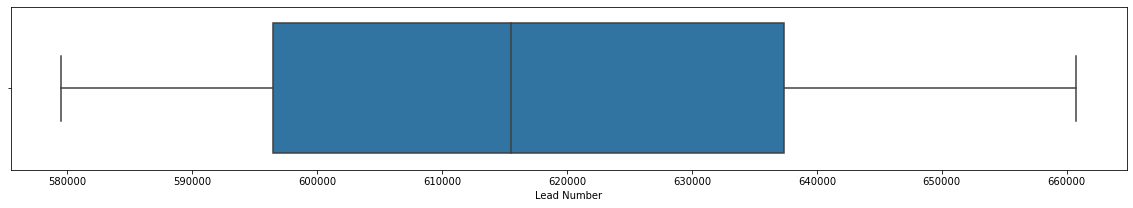

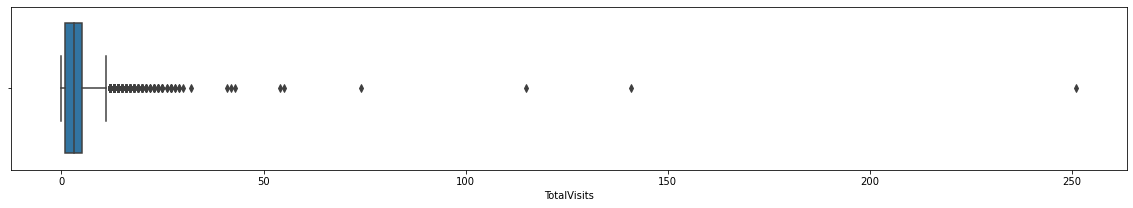

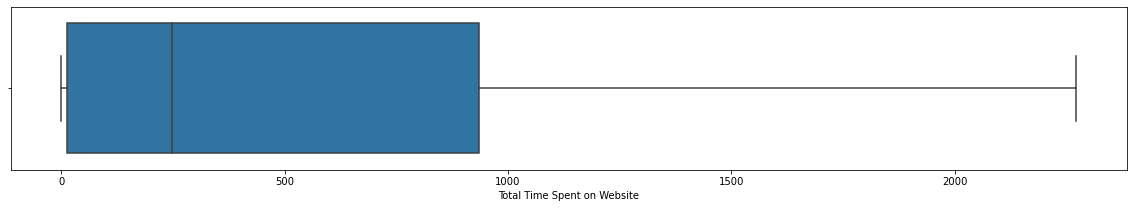

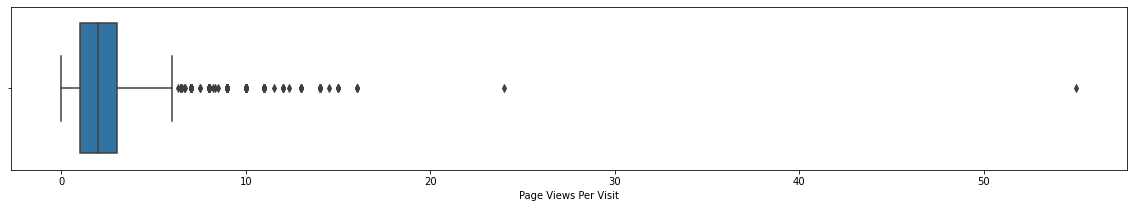

In [27]:
#For each numeric column draw a boxplot:
for column in leads_numeric:
    plt.figure(figsize=[20,3])
#     df_ad.boxplot([column])
    sns.boxplot(leads_numeric[column])
    plt.show()

In [28]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Unique Category Analysis:

In [29]:
# Find columns with non numeric dtypes(categorical datatypes) and store in variable which is a column list, used to subset and get a new dataframe
cat_cols = leads.select_dtypes(exclude=[np.number]).columns
print (cat_cols)

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [30]:
cat_cols.shape

(22,)

In [31]:
#Create a new dataframe which has only categorical columns. We need this to iterate over the dataset to find valuecounts() in such columns
leads_cat=leads.loc[:,cat_cols]

In [32]:
#Drop 'Prospect ID' Column as we don't want the valuecounts() of this variable in our analysis(Harsh on RAM)
leads_cat.drop('Prospect ID', axis=1, inplace=True)

In [33]:
#calculate the percentage of first column 'Lead Origin' category as a sample
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

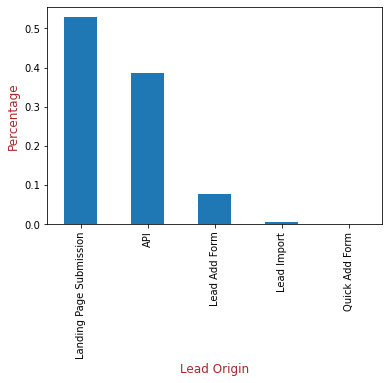

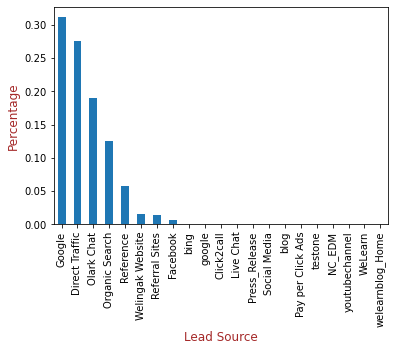

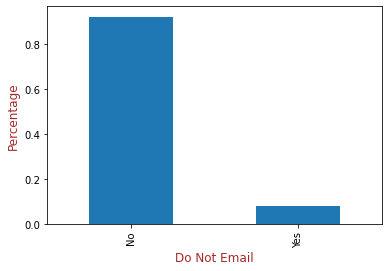

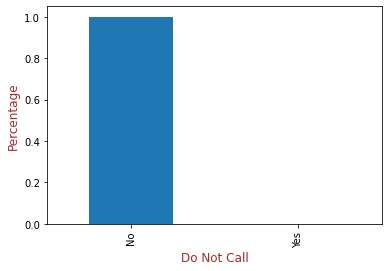

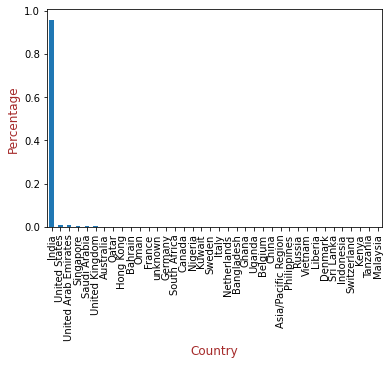

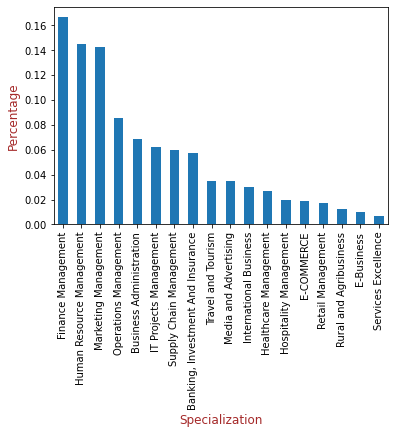

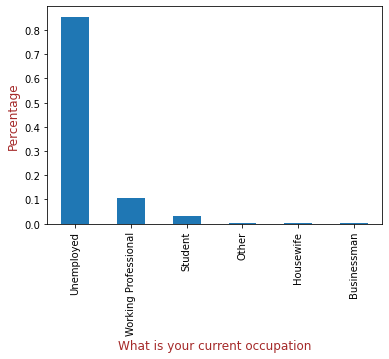

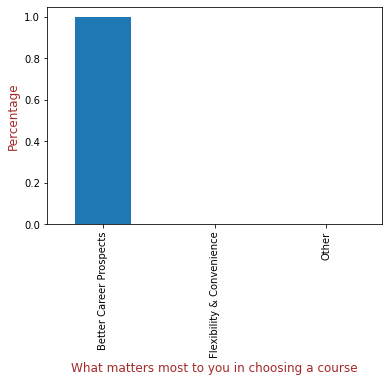

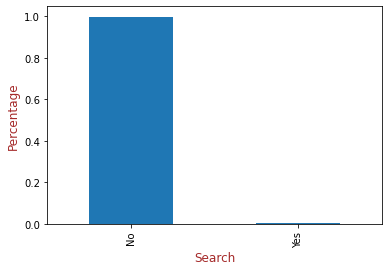

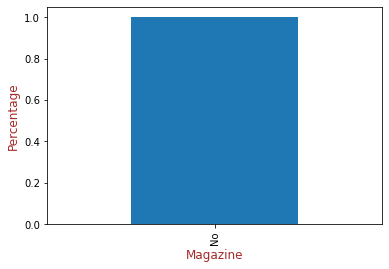

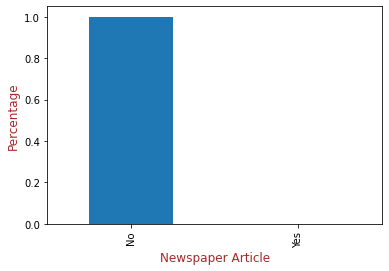

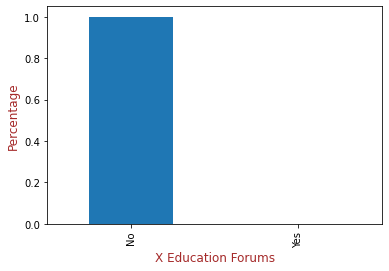

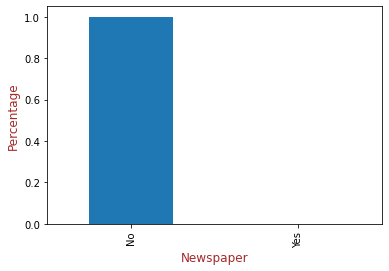

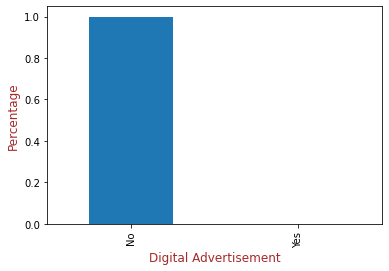

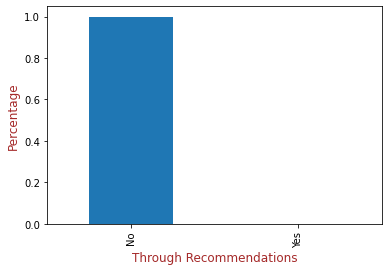

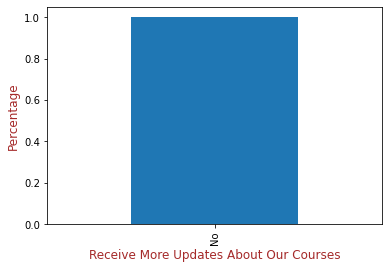

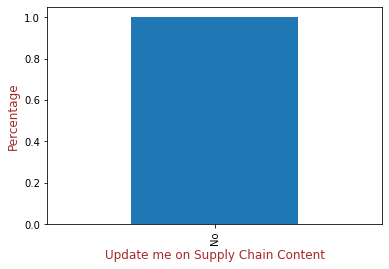

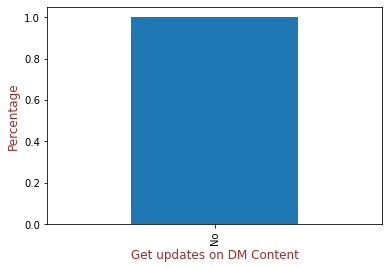

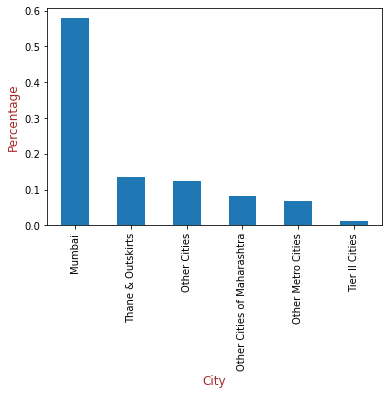

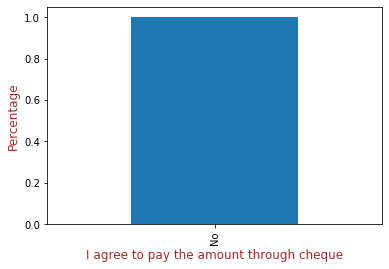

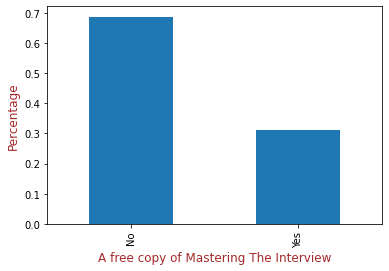

In [34]:
#For each categorical column in leads except 'Prospect ID' draw a barplot:
#Inspect categories for skewness , group low weighted variables in a single category to reduce dummy variables.
for column in leads_cat.columns:
    leads[column].value_counts(normalize=True).plot.bar()
    plt.xlabel(column, fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
    plt.show()

#### Inference from above:
- Features like "do not call", are highly skewed. Most of them have opted for "do not call" such variables are of least use to analysis and to be dropped.
- Features likes "City" and "Country" are highly skewed and not of use to us in analysis. So drop it.
- "What matters to you most in choosing a course?" is highly skewed and can be dropped.

### Inspect categories for skewness , group low weighted variables in a single category(like say 'others') to reduce dummy variables.

#### 'Lead Origin' Treatment

In [35]:
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [36]:
#Define a Dictionary Mapping for Categorical Variable Binning: 'Lead Import' and 'Quick Add Form' is also treated as 'Others'
value_dict_Lead_Origin = {'Landing Page Submission':'Landing Page Submission', 
              'API':'API', 
              'Lead Add Form':'Lead Add Form', 
              'Lead Import':'Others',
              'Quick Add Form':'Others'}

In [37]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
leads['Lead Origin'] = leads['Lead Origin'].replace(value_dict_Lead_Origin)

In [38]:
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Others                     0.006061
Name: Lead Origin, dtype: float64

#### 'Lead Source' Treatment

In [39]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Press_Release        0.000217
Social Media         0.000217
blog                 0.000109
Pay per Click Ads    0.000109
testone              0.000109
NC_EDM               0.000109
youtubechannel       0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
Name: Lead Source, dtype: float64

In [40]:
#Define a Dictionary Mapping for Categorical Variable Binning: 
value_dict_Lead_Source = {'Google':'Google', 
              'Direct Traffic':'Direct Traffic', 
              'Olark Chat':'Olark Chat', 
              'Organic Search':'Organic Search',
              'Reference':'Reference',
                         'Welingak Website':'Others',
                         'Referral Sites':'Others', 
                         'Facebook':'Others',
                         'bing':'Others',
                         'google':'Google',
                         'Click2call':'Others',
                         'Social Media':'Others',
                         'Press_Release':'Others',
                         'Live Chat':'Others',
                         'WeLearn':'Others',
                         'Pay per Click Ads':'Others',
                         'welearnblog_Home':'Others',
                         'testone':'Others',
                         'youtubechannel':'Others',
                         'blog':'Others',
                         'NC_EDM':'Others'}

In [41]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
leads['Lead Source'] = leads['Lead Source'].replace(value_dict_Lead_Source)

In [42]:
leads['Lead Source'].value_counts(normalize=True)

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Others            0.037484
Name: Lead Source, dtype: float64

#### 'Country' variable treatment (Drop it as its higly skewed towards a single country 'India)

In [43]:
leads.Country.value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
South Africa            0.000590
Canada                  0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Italy                   0.000295
Netherlands             0.000295
Bangladesh              0.000295
Ghana                   0.000295
Uganda                  0.000295
Belgium                 0.000295
China                   0.000295
Asia/Pacific Region     0.000295
Philippines             0.000295
Russia                  0.000148
Vietnam                 0.000148
Liberia   

In [44]:
leads.drop('Country', axis=1, inplace=True)

#### 'Specialization' Variable Treatment

In [45]:
leads.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [46]:
#Define a Dictionary Mapping for Categorical Variable Binning: 
value_dict_Specialization = {'Finance Management':'Finance Management', 
              'Human Resource Management':'Human Resource Management', 
              'Marketing Management':'Marketing Management', 
              'Operations Management':'Operations Management',
              'IT Projects Management':'IT Projects Management',
                         'Supply Chain Management':'Supply Chain Management',
                         'Banking, Investment And Insurance':'Banking, Investment And Insurance', 
                         'Media and Advertising':'Media and Advertising',
                         'Travel and Tourism':'Travel and Tourism',
                         'International Business':'International Business',
                         'Healthcare Management':'Healthcare Management',
                         'Hospitality Management':'Others',
                         'E-COMMERCE':'Others',
                         'Retail Management':'Others',
                         'Rural and Agribusiness':'Others',
                         'E-Business':'Others',
                         'Services Excellence':'Others'}

In [47]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
leads['Specialization'] = leads['Specialization'].replace(value_dict_Specialization)

In [48]:
leads.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Others                               0.084642
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Name: Specialization, dtype: float64

#### 'What is your current occupation' treatment

In [49]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [50]:
#Define a Dictionary Mapping for Categorical Variable Binning: 
value_dict_Current_Occupation = {'Unemployed':'Unemployed', 
              'Working Professional':'Working Professional', 
              'Student':'Student', 
              'Other':'Others',
              'Housewife':'Others',
              'Businessman': 'Others'}

In [51]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
leads['What is your current occupation'] = leads['What is your current occupation'].replace(value_dict_Current_Occupation)

In [52]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Others                  0.005191
Name: What is your current occupation, dtype: float64

#### 'What matters to you in choosing a course' variable treatment(Drop it)

In [53]:
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [54]:
leads.drop('What matters most to you in choosing a course', axis=1, inplace=True)

#### 'City' variable treatment

In [55]:
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [56]:
#Define a Dictionary Mapping for Categorical Variable Binning: 
value_dict_City = {'Mumbai':'Tier I Cities', 
              'Thane & Outskirts':'Tier I Cities', 
              'Other Cities':'Tier II Cities', 
              'Other Cities of Maharashtra':'Tier II Cities',
              'Other Metro Cities':'Tier I Cities',
              'Tier II Cities': 'Tier II Cities'}

In [57]:
# Use the 'Dictionary Mapping' to form new bins for the categorical Variable.
leads['City'] = leads['City'].replace(value_dict_City)

In [58]:
leads.City.value_counts(normalize=True)

Tier I Cities     0.781547
Tier II Cities    0.218453
Name: City, dtype: float64

#### Checking percentage of missing values after analysis and dropping certain variables

In [59]:

# round(100*(leads.isnull().sum()/len(leads.index)), 2)
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
City                                                                          City   
Specialization                                                      Specialization   
What is your current occupation                    What is your current occupation   
TotalVisits                                                            TotalVisits   
Page Views Per Visit                                          Page Views Per Visit   
Lead Source                                                            Lead Source   
Prospect ID                                                            Prospect ID   
X Education Forums                                              X Education Forums   
I agree to pay the amount through cheque  I agree to pay the amount through cheque   
Get updates on DM Content                                Get updates on DM Content   
Update me on Supply Chain Content                Update me on Supply Chain Content   
Receive More Updates About Our Courses      Receive More Updates About Our Courses   
Through Recommendations                                    Through Recommendations   
Digital Advertisement                                        Digital Advertisement   
Newspaper                                                                Newspaper   
Search                                                                      Search   
Newspaper Article                                                Newspaper Article   
Magazine                                                                  Magazine   
Lead Number                                                            Lead Number   
Total Time Spent on Website                            Total Time Spent on Website   
Converted                                                                Converted   
Do Not Call                                                            Do Not Call   
Do Not Email                                                          Do Not Email   
Lead Origin                                                            Lead Origin   
A free copy of Mastering The Interview      A free copy of Mastering The Interview   

                                          No of Nulls  percent_missing  
City                                             3669        39.707792  
Specialization                                   3380        36.580087  
What is your current occupation                  2690        29.112554  
TotalVisits                                       137         1.482684  
Page Views Per Visit                              137         1.482684  
Lead Source                                        36         0.389610  
Prospect ID                                         0         0.000000  
X Education Forums                                  0         0.000000  
I agree to pay the amount through cheque            0         0.000000  
Get updates on DM Content                           0         0.000000  
Update me on Supply Chain Content                   0         0.000000  
Receive More Updates About Our Courses              0         0.000000  
Through Recommendations                             0         0.000000  
Digital Advertisement                               0         0.000000  
Newspaper                                           0         0.000000  
Search                                              0         0.000000  
Newspaper Article                                   0         0.000000  
Magazine                                            0         0.000000  
Lead Number                                         0         0.000000  
Total Time Spent on Website                         0         0.000000  
Converted                                           0         0.000000  
Do Not Call                                         0         0.000000  
Do Not Email                                        0         0.000000  
Lead Origin                                         0         0.000000  
A free co

#### Inference:
- Drop the rows for City, as they have high missing value percentage. Later check the % of missing values again to see whether any other rows needs to be dropped.


In [60]:
#Rows and columns before deleting rows which have high null values in respective columns
leads.shape

(9240, 25)

In [61]:
#Drop the rows having null values in the 'City' field
leads=leads[~leads.City.isnull()]
leads.shape

(5571, 25)

In [62]:
# Check percentage of missing values again after dropping rows which have 'City' column value as nulls
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
What is your current occupation                    What is your current occupation   
Specialization                                                      Specialization   
TotalVisits                                                            TotalVisits   
Page Views Per Visit                                          Page Views Per Visit   
Lead Source                                                            Lead Source   
Prospect ID                                                            Prospect ID   
X Education Forums                                              X Education Forums   
I agree to pay the amount through cheque  I agree to pay the amount through cheque   
City                                                                          City   
Get updates on DM Content                                Get updates on DM Content   
Update me on Supply Chain Content                Update me on Supply Chain Content   
Receive More Updates About Our Courses      Receive More Updates About Our Courses   
Through Recommendations                                    Through Recommendations   
Digital Advertisement                                        Digital Advertisement   
Newspaper                                                                Newspaper   
Search                                                                      Search   
Newspaper Article                                                Newspaper Article   
Magazine                                                                  Magazine   
Lead Number                                                            Lead Number   
Total Time Spent on Website                            Total Time Spent on Website   
Converted                                                                Converted   
Do Not Call                                                            Do Not Call   
Do Not Email                                                          Do Not Email   
Lead Origin                                                            Lead Origin   
A free copy of Mastering The Interview      A free copy of Mastering The Interview   

                                          No of Nulls  percent_missing  
What is your current occupation                  1270        22.796625  
Specialization                                    197         3.536169  
TotalVisits                                        68         1.220607  
Page Views Per Visit                               68         1.220607  
Lead Source                                         5         0.089750  
Prospect ID                                         0         0.000000  
X Education Forums                                  0         0.000000  
I agree to pay the amount through cheque            0         0.000000  
City                                                0         0.000000  
Get updates on DM Content                           0         0.000000  
Update me on Supply Chain Content                   0         0.000000  
Receive More Updates About Our Courses              0         0.000000  
Through Recommendations                             0         0.000000  
Digital Advertisement                               0         0.000000  
Newspaper                                           0         0.000000  
Search                                              0         0.000000  
Newspaper Article                                   0         0.000000  
Magazine                                            0         0.000000  
Lead Number                                         0         0.000000  
Total Time Spent on Website                         0         0.000000  
Converted                                           0         0.000000  
Do Not Call                                         0         0.000000  
Do Not Email                                        0         0.000000  
Lead Origin                                         0         0.000000  
A free co

In [63]:
#Drop the rows having null values in the 'What is your current occupation' field
leads=leads[~leads['What is your current occupation'].isnull()]
leads.shape

(4301, 25)

In [64]:
# Check percentage of missing values again after dropping rows which have 'What is your current occupation' column value as nulls
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
Specialization                                                      Specialization   
TotalVisits                                                            TotalVisits   
Page Views Per Visit                                          Page Views Per Visit   
Lead Source                                                            Lead Source   
Prospect ID                                                            Prospect ID   
X Education Forums                                              X Education Forums   
I agree to pay the amount through cheque  I agree to pay the amount through cheque   
City                                                                          City   
Get updates on DM Content                                Get updates on DM Content   
Update me on Supply Chain Content                Update me on Supply Chain Content   
Receive More Updates About Our Courses      Receive More Updates About Our Courses   
Through Recommendations                                    Through Recommendations   
Digital Advertisement                                        Digital Advertisement   
Newspaper                                                                Newspaper   
Search                                                                      Search   
Newspaper Article                                                Newspaper Article   
Magazine                                                                  Magazine   
Lead Number                                                            Lead Number   
What is your current occupation                    What is your current occupation   
Total Time Spent on Website                            Total Time Spent on Website   
Converted                                                                Converted   
Do Not Call                                                            Do Not Call   
Do Not Email                                                          Do Not Email   
Lead Origin                                                            Lead Origin   
A free copy of Mastering The Interview      A free copy of Mastering The Interview   

                                          No of Nulls  percent_missing  
Specialization                                    172         3.999070  
TotalVisits                                        62         1.441525  
Page Views Per Visit                               62         1.441525  
Lead Source                                         5         0.116252  
Prospect ID                                         0         0.000000  
X Education Forums                                  0         0.000000  
I agree to pay the amount through cheque            0         0.000000  
City                                                0         0.000000  
Get updates on DM Content                           0         0.000000  
Update me on Supply Chain Content                   0         0.000000  
Receive More Updates About Our Courses              0         0.000000  
Through Recommendations                             0         0.000000  
Digital Advertisement                               0         0.000000  
Newspaper                                           0         0.000000  
Search                                              0         0.000000  
Newspaper Article                                   0         0.000000  
Magazine                                            0         0.000000  
Lead Number                                         0         0.000000  
What is your current occupation                     0         0.000000  
Total Time Spent on Website                         0         0.000000  
Converted                                           0         0.000000  
Do Not Call                                         0         0.000000  
Do Not Email                                        0         0.000000  
Lead Origin                                         0         0.000000  
A free co

In [65]:
leads['Specialization'].mode()[0]

'Finance Management'

In [66]:
#Drop the rows having null values in the 'What is your current occupation' field
leads=leads[~leads['Specialization'].isnull()]
leads.shape

(4129, 25)

#### Point to Note:
- Feature "specialization" the null values in them i.e the level with "Select" under them, could be treated differently.
- Rather than deleting all the rows where specialization is null, we could create dummies for this field as explicitly drop the feature dmy_select, rather than saying drop_first=True. This way you could save data loss(row or record loss) and also at the same time get rid of this level "Select" which is nothing but null values.

In [67]:
# Check percentage of missing values again after dropping rows which have 'Specialization' column value as nulls
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
TotalVisits                                                            TotalVisits   
Page Views Per Visit                                          Page Views Per Visit   
Lead Source                                                            Lead Source   
Prospect ID                                                            Prospect ID   
Newspaper Article                                                Newspaper Article   
I agree to pay the amount through cheque  I agree to pay the amount through cheque   
City                                                                          City   
Get updates on DM Content                                Get updates on DM Content   
Update me on Supply Chain Content                Update me on Supply Chain Content   
Receive More Updates About Our Courses      Receive More Updates About Our Courses   
Through Recommendations                                    Through Recommendations   
Digital Advertisement                                        Digital Advertisement   
Newspaper                                                                Newspaper   
X Education Forums                                              X Education Forums   
Search                                                                      Search   
Magazine                                                                  Magazine   
Lead Number                                                            Lead Number   
What is your current occupation                    What is your current occupation   
Specialization                                                      Specialization   
Total Time Spent on Website                            Total Time Spent on Website   
Converted                                                                Converted   
Do Not Call                                                            Do Not Call   
Do Not Email                                                          Do Not Email   
Lead Origin                                                            Lead Origin   
A free copy of Mastering The Interview      A free copy of Mastering The Interview   

                                          No of Nulls  percent_missing  
TotalVisits                                        43         1.041414  
Page Views Per Visit                               43         1.041414  
Lead Source                                         5         0.121095  
Prospect ID                                         0         0.000000  
Newspaper Article                                   0         0.000000  
I agree to pay the amount through cheque            0         0.000000  
City                                                0         0.000000  
Get updates on DM Content                           0         0.000000  
Update me on Supply Chain Content                   0         0.000000  
Receive More Updates About Our Courses              0         0.000000  
Through Recommendations                             0         0.000000  
Digital Advertisement                               0         0.000000  
Newspaper                                           0         0.000000  
X Education Forums                                  0         0.000000  
Search                                              0         0.000000  
Magazine                                            0         0.000000  
Lead Number                                         0         0.000000  
What is your current occupation                     0         0.000000  
Specialization                                      0         0.000000  
Total Time Spent on Website                         0         0.000000  
Converted                                           0         0.000000  
Do Not Call                                         0         0.000000  
Do Not Email                                        0         0.000000  
Lead Origin                                         0         0.000000  
A free co

#### Inference
- Impute values with median for TotalVisits, Page Views Per Visit, as they have low missing value percentage and These variables have outliers (As noted in cell no 26 above) thus a median value fits good for an imputation rather than a 'mean' value.
- Impute values with mode for 'Lead Source' as it is a categorical variable.

In [68]:
#Check the most common value in the 'Lead Source'column
leads['Lead Source'].mode()[0]

'Direct Traffic'

In [69]:
#Replace the nulls in the 'Lead Source' column with the above value
leads['Lead Source']=leads['Lead Source'].fillna(leads['Lead Source'].mode()[0]) 

In [70]:
leads.TotalVisits.median()

4.0

In [71]:
leads['Page Views Per Visit'].median()

3.0

In [72]:
#Replace the nulls in the 'Lead Source' column with the above value
leads['TotalVisits']=leads['TotalVisits'].fillna(leads.TotalVisits.median()) 

In [73]:
#Replace the nulls in the 'Page Views Per Visit' column with the above value
leads['Page Views Per Visit']=leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median()) 

In [74]:
# Check percentage of missing values again after necessary imputation:
percent_missing = leads.isnull().sum() * 100 / len(leads)
missing_value_df = pd.DataFrame({'column_name': leads.columns, 'No of Nulls':leads.isnull().sum(),'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_df

column_name  \
Prospect ID                                                            Prospect ID   
Magazine                                                                  Magazine   
I agree to pay the amount through cheque  I agree to pay the amount through cheque   
City                                                                          City   
Get updates on DM Content                                Get updates on DM Content   
Update me on Supply Chain Content                Update me on Supply Chain Content   
Receive More Updates About Our Courses      Receive More Updates About Our Courses   
Through Recommendations                                    Through Recommendations   
Digital Advertisement                                        Digital Advertisement   
Newspaper                                                                Newspaper   
X Education Forums                                              X Education Forums   
Newspaper Article                                                Newspaper Article   
Search                                                                      Search   
Lead Number                                                            Lead Number   
What is your current occupation                    What is your current occupation   
Specialization                                                      Specialization   
Page Views Per Visit                                          Page Views Per Visit   
Total Time Spent on Website                            Total Time Spent on Website   
TotalVisits                                                            TotalVisits   
Converted                                                                Converted   
Do Not Call                                                            Do Not Call   
Do Not Email                                                          Do Not Email   
Lead Source                                                            Lead Source   
Lead Origin                                                            Lead Origin   
A free copy of Mastering The Interview      A free copy of Mastering The Interview   

                                          No of Nulls  percent_missing  
Prospect ID                                         0              0.0  
Magazine                                            0              0.0  
I agree to pay the amount through cheque            0              0.0  
City                                                0              0.0  
Get updates on DM Content                           0              0.0  
Update me on Supply Chain Content                   0              0.0  
Receive More Updates About Our Courses              0              0.0  
Through Recommendations                             0              0.0  
Digital Advertisement                               0              0.0  
Newspaper                                           0              0.0  
X Education Forums                                  0              0.0  
Newspaper Article                                   0              0.0  
Search                                              0              0.0  
Lead Number                                         0              0.0  
What is your current occupation                     0              0.0  
Specialization                                      0              0.0  
Page Views Per Visit                                0              0.0  
Total Time Spent on Website                         0              0.0  
TotalVisits                                         0              0.0  
Converted                                           0              0.0  
Do Not Call                                         0              0.0  
Do Not Email                                        0              0.0  
Lead Source                                         0              0.0  
Lead Origin                                         0              0.0  
A free co

In [75]:
leads.shape

(4129, 25)

#### Check percentage of retained rows: 44% of rows are retained for further analysis

In [76]:
print(4129/9240*100)

44.68614718614718


#### Point to Note:
- Feature "specialization" the null values in them i.e the level with "Select" under them, could be treated differently.
- Rather than deleting all the rows where specialization is null, we could create dummies for this field as explicitly drop the feature dmy_select, rather than saying drop_first=True. This way you could save data loss(row or record loss) and also at the same time get rid of this level "Select" which is nothing but null values.

## DATA PREPARATION

In [77]:
leads.head(2)

Prospect ID  Lead Number              Lead Origin  \
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   

   Total Time Spent on Website  Page Views Per Visit           Specialization  \
2                         1532                   2.0  Business Administration   
3                          305                   1.0    Media and Advertising   

  What is your current occupation Search Magazine Newspaper Article  \
2                         Student     No       No                No   
3                      Unemployed     No       No                No   

  X Education Forums Newspaper Digital Advertisement Through Recommendations  \
2                 No        No                    No                      No   
3                 No        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
2                                     No                                No   
3                                     No                                No   

  Get updates on DM Content           City  \
2                        No  Tier I Cities   
3                        No  Tier I Cities   

  I agree to pay the amount through cheque  \
2                                       No   
3                                       No   

  A free copy of Mastering The Interview  
2                                    Yes  
3                                     No

#### Converting  binary variables (Yes/No) to 0/1¶

In [78]:
varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
            'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
           'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [79]:
leads.head(2)

Prospect ID  Lead Number              Lead Origin  \
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   

   Total Time Spent on Website  Page Views Per Visit           Specialization  \
2                         1532                   2.0  Business Administration   
3                          305                   1.0    Media and Advertising   

  What is your current occupation  Search  Magazine  Newspaper Article  \
2                         Student       0         0                  0   
3                      Unemployed       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
2                   0          0                      0   
3                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
2                        0                                       0   
3                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
2                                  0                          0   
3                                  0                          0   

            City  I agree to pay the amount through cheque  \
2  Tier I Cities                                         0   
3  Tier I Cities                                         0   

   A free copy of Mastering The Interview  
2                                       1  
3                                       0

In [80]:
# Find columns with non numeric dtypes(categorical datatypes) and store in variable which is a column list, used to subset and get a new dataframe
cat_cols = leads.select_dtypes(exclude=[np.number]).columns
print (cat_cols)

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Specialization',
       'What is your current occupation', 'City'],
      dtype='object')


In [81]:
cat_cols.shape

(6,)

In [82]:
round(leads.corr(),2)

Lead Number  Do Not Email  \
Lead Number                                      1.00         -0.11   
Do Not Email                                    -0.11          1.00   
Do Not Call                                      0.02         -0.01   
Converted                                        0.13         -0.19   
TotalVisits                                     -0.00          0.02   
Total Time Spent on Website                      0.04         -0.08   
Page Views Per Visit                             0.03          0.03   
Search                                           0.02         -0.01   
Magazine                                          NaN           NaN   
Newspaper Article                                 NaN           NaN   
X Education Forums                                NaN           NaN   
Newspaper                                         NaN           NaN   
Digital Advertisement                             NaN           NaN   
Through Recommendations                          0.00         -0.01   
Receive More Updates About Our Courses            NaN           NaN   
Update me on Supply Chain Content                 NaN           NaN   
Get updates on DM Content                         NaN           NaN   
I agree to pay the amount through cheque          NaN           NaN   
A free copy of Mastering The Interview          -0.13          0.04   

                                          Do Not Call  Converted  TotalVisits  \
Lead Number                                      0.02       0.13        -0.00   
Do Not Email                                    -0.01      -0.19         0.02   
Do Not Call                                      1.00       0.02        -0.00   
Converted                                        0.02       1.00         0.03   
TotalVisits                                     -0.00       0.03         1.00   
Total Time Spent on Website                      0.00       0.40         0.07   
Page Views Per Visit                            -0.02      -0.06         0.37   
Search                                          -0.00       0.01         0.02   
Magazine                                          NaN        NaN          NaN   
Newspaper Article                                 NaN        NaN          NaN   
X Education Forums                                NaN        NaN          NaN   
Newspaper                                         NaN        NaN          NaN   
Digital Advertisement                             NaN        NaN          NaN   
Through Recommendations                         -0.00       0.02         0.02   
Receive More Updates About Our Courses            NaN        NaN          NaN   
Update me on Supply Chain Content                 NaN        NaN          NaN   
Get updates on DM Content                         NaN        NaN          NaN   
I agree to pay the amount through cheque          NaN        NaN          NaN   
A free copy of Mastering The Interview          -0.02      -0.15         0.07   

                                          Total Time Spent on Website  \
Lead Number                                                      0.04   
Do Not Email                                                    -0.08   
Do Not Call                                                      0.00   
Converted                                                        0.40   
TotalVisits                                                      0.07   
Total Time Spent on Website                                      1.00   
Page Views Per Visit                                             0.12   
Search                                                          -0.01   
Magazine                                                          NaN   
Newspaper Article                                                 NaN   
X Education Forums                                                NaN   
Newspaper                                                         NaN   
Digital Advertisement                              

In [83]:
leads.Magazine.value_counts()

0    4129
Name: Magazine, dtype: int64

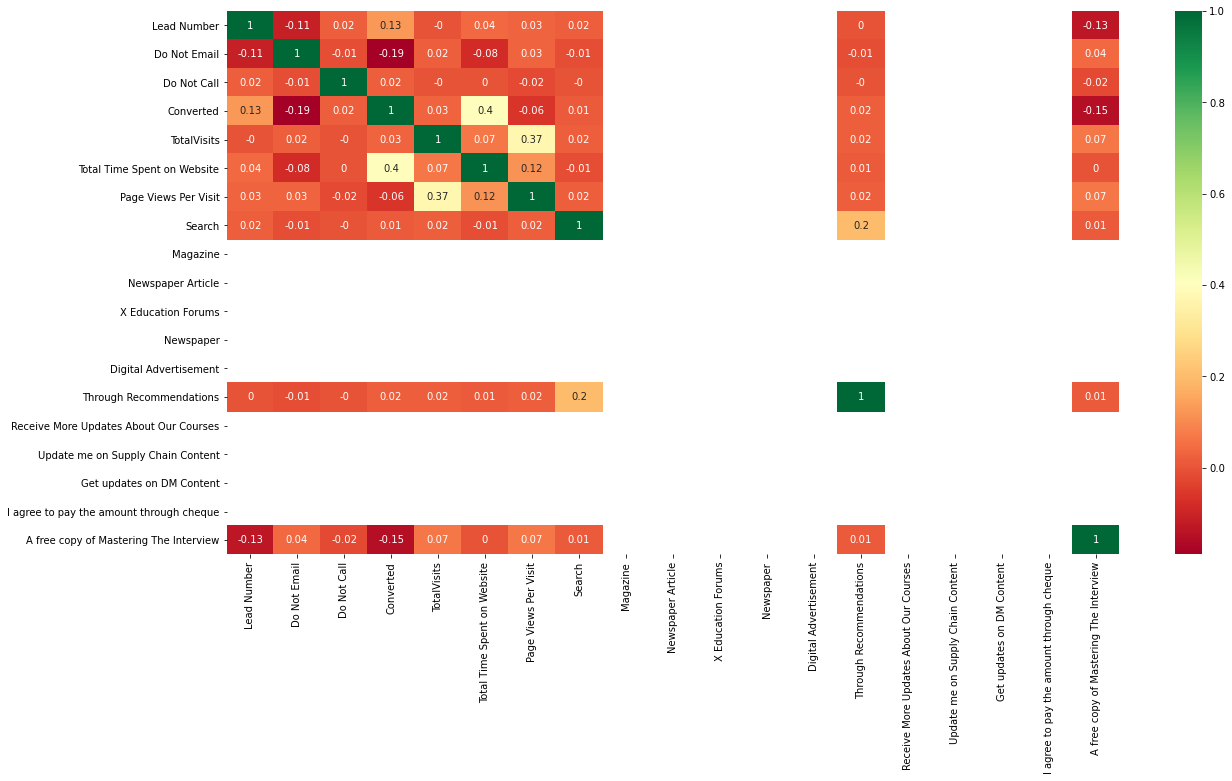

In [84]:
#corr() works only for numerical variables, further down we will convert all categorical also to numerical by using concept of
#dummy variables for machine learning purposes
plt.figure(figsize=(20, 10))
sns.heatmap(round(leads.corr(),2), cmap='RdYlGn', annot = True)
plt.show()

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [85]:
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.849600
API                        0.091305
Lead Add Form              0.054977
Others                     0.004117
Name: Lead Origin, dtype: float64

In [86]:
leads['Lead Source'].value_counts(normalize=True)

Direct Traffic    0.424800
Google            0.340034
Organic Search    0.136353
Reference         0.049891
Olark Chat        0.033180
Others            0.015742
Name: Lead Source, dtype: float64

In [87]:
leads['Specialization'].value_counts(normalize=True)

Finance Management                   0.172681
Human Resource Management            0.142407
Marketing Management                 0.132720
Others                               0.087188
Operations Management                0.084040
Business Administration              0.066602
IT Projects Management               0.064665
Supply Chain Management              0.061516
Banking, Investment And Insurance    0.057157
Media and Advertising                0.037782
Travel and Tourism                   0.035117
International Business               0.031242
Healthcare Management                0.026883
Name: Specialization, dtype: float64

In [88]:
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.859772
Working Professional    0.105595
Student                 0.028578
Others                  0.006055
Name: What is your current occupation, dtype: float64

In [89]:
leads['City'].value_counts(normalize=True)

Tier I Cities     0.787358
Tier II Cities    0.212642
Name: City, dtype: float64

In [90]:
# # Creating a dummy variable for some of the categorical variables and dropping the last one.(If its possible)
# dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'What is your current occupation', 'City']], drop_last=True,)

# # Adding the results to the master dataframe
# leads = pd.concat([leads, dummy1], axis=1)

#### Dropping the variables which are of not good use to business(such as 'Others' and 'Tier II Cities') and keeping the variables required by the business into the model:

In [91]:
# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(leads['Lead Origin'], prefix='Dmy Lead Origin')
# Dropping MultipleLines_No phone service column
lo1 = lo.drop(['Dmy Lead Origin_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,lo1], axis=1)

In [92]:
# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(leads['Lead Source'], prefix='Dmy Lead Source')
# Dropping MultipleLines_No phone service column
ls1 = ls.drop(['Dmy Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ls1], axis=1)

In [93]:
# Creating dummy variables for the variable 'What is your current occupation'
co = pd.get_dummies(leads['What is your current occupation'], prefix='Dmy What is your current occupation')
# Dropping MultipleLines_No phone service column
co1 = co.drop(['Dmy What is your current occupation_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,co1], axis=1)

In [94]:
# Creating dummy variables for the variable 'City'
c = pd.get_dummies(leads['City'], prefix='Dmy City')
# Dropping MultipleLines_No phone service column
c1 = c.drop(['Dmy City_Tier II Cities'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,c1], axis=1)

In [95]:
# Creating dummy variables for the variable 'Specialization'
s = pd.get_dummies(leads['Specialization'], prefix='Dmy Specialization')
# Dropping MultipleLines_No phone service column
s1 = s.drop(['Dmy Specialization_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,s1], axis=1)

In [96]:
leads.shape

(4129, 49)

In [97]:
leads.head(1)

Prospect ID  Lead Number              Lead Origin  \
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
2  Direct Traffic             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit           Specialization  \
2                         1532                   2.0  Business Administration   

  What is your current occupation  Search  Magazine  Newspaper Article  \
2                         Student       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
2                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
2                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
2                                  0                          0   

            City  I agree to pay the amount through cheque  \
2  Tier I Cities                                         0   

   A free copy of Mastering The Interview  Dmy Lead Origin_API  \
2                                       1                    0   

   Dmy Lead Origin_Landing Page Submission  Dmy Lead Origin_Lead Add Form  \
2                                        1                              0   

   Dmy Lead Source_Direct Traffic  Dmy Lead Source_Google  \
2                               1                       0   

   Dmy Lead Source_Olark Chat  Dmy Lead Source_Organic Search  \
2                           0                               0   

   Dmy Lead Source_Reference  Dmy What is your current occupation_Student  \
2                          0                                            1   

   Dmy What is your current occupation_Unemployed  \
2                                               0   

   Dmy What is your current occupation_Working Professional  \
2                                                  0          

   Dmy City_Tier I Cities  \
2                       1   

   Dmy Specialization_Banking, Investment And Insurance  \
2                                                  0      

   Dmy Specialization_Business Administration  \
2                                           1   

   Dmy Specialization_Finance Management  \
2                                      0   

   Dmy Specialization_Healthcare Management  \
2                                         0   

   Dmy Specialization_Human Resource Management  \
2                                             0   

   Dmy Specialization_IT Projects Management  \
2                                          0   

   Dmy Specialization_International Business  \
2                                          0   

   Dmy Specialization_Marketing Management  \
2                                        0   

   Dmy Specialization_Media and Advertising  \
2                                         0   

   Dmy Specialization_Operations Management  \
2                                         0   

   Dmy Specialization_Supply Chain Management  \
2                                           0   

   Dmy Specialization_Travel and Tourism  
2                                      0

#### Dropping the repeated variables:

In [98]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'What is your current occupation', 'City','Specialization'], 1)

In [99]:
#Notice we have 44 variables or features to play with now
leads.shape

(4129, 44)

In [100]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129 entries, 2 to 9239
Data columns (total 44 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Prospect ID                                               4129 non-null   object 
 1   Lead Number                                               4129 non-null   int64  
 2   Do Not Email                                              4129 non-null   int64  
 3   Do Not Call                                               4129 non-null   int64  
 4   Converted                                                 4129 non-null   int64  
 5   TotalVisits                                               4129 non-null   float64
 6   Total Time Spent on Website                               4129 non-null   int64  
 7   Page Views Per Visit                                      4129 non-null   float64
 8   Search            

In [101]:
leads.head(1)

Prospect ID  Lead Number  Do Not Email  \
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
2            0          1          2.0                         1532   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
2                   2.0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
2                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
2                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
2                                  0                          0   

   I agree to pay the amount through cheque  \
2                                         0   

   A free copy of Mastering The Interview  Dmy Lead Origin_API  \
2                                       1                    0   

   Dmy Lead Origin_Landing Page Submission  Dmy Lead Origin_Lead Add Form  \
2                                        1                              0   

   Dmy Lead Source_Direct Traffic  Dmy Lead Source_Google  \
2                               1                       0   

   Dmy Lead Source_Olark Chat  Dmy Lead Source_Organic Search  \
2                           0                               0   

   Dmy Lead Source_Reference  Dmy What is your current occupation_Student  \
2                          0                                            1   

   Dmy What is your current occupation_Unemployed  \
2                                               0   

   Dmy What is your current occupation_Working Professional  \
2                                                  0          

   Dmy City_Tier I Cities  \
2                       1   

   Dmy Specialization_Banking, Investment And Insurance  \
2                                                  0      

   Dmy Specialization_Business Administration  \
2                                           1   

   Dmy Specialization_Finance Management  \
2                                      0   

   Dmy Specialization_Healthcare Management  \
2                                         0   

   Dmy Specialization_Human Resource Management  \
2                                             0   

   Dmy Specialization_IT Projects Management  \
2                                          0   

   Dmy Specialization_International Business  \
2                                          0   

   Dmy Specialization_Marketing Management  \
2                                        0   

   Dmy Specialization_Media and Advertising  \
2                                         0   

   Dmy Specialization_Operations Management  \
2                                         0   

   Dmy Specialization_Supply Chain Management  \
2                                           0   

   Dmy Specialization_Travel and Tourism  
2                                      0

In [102]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

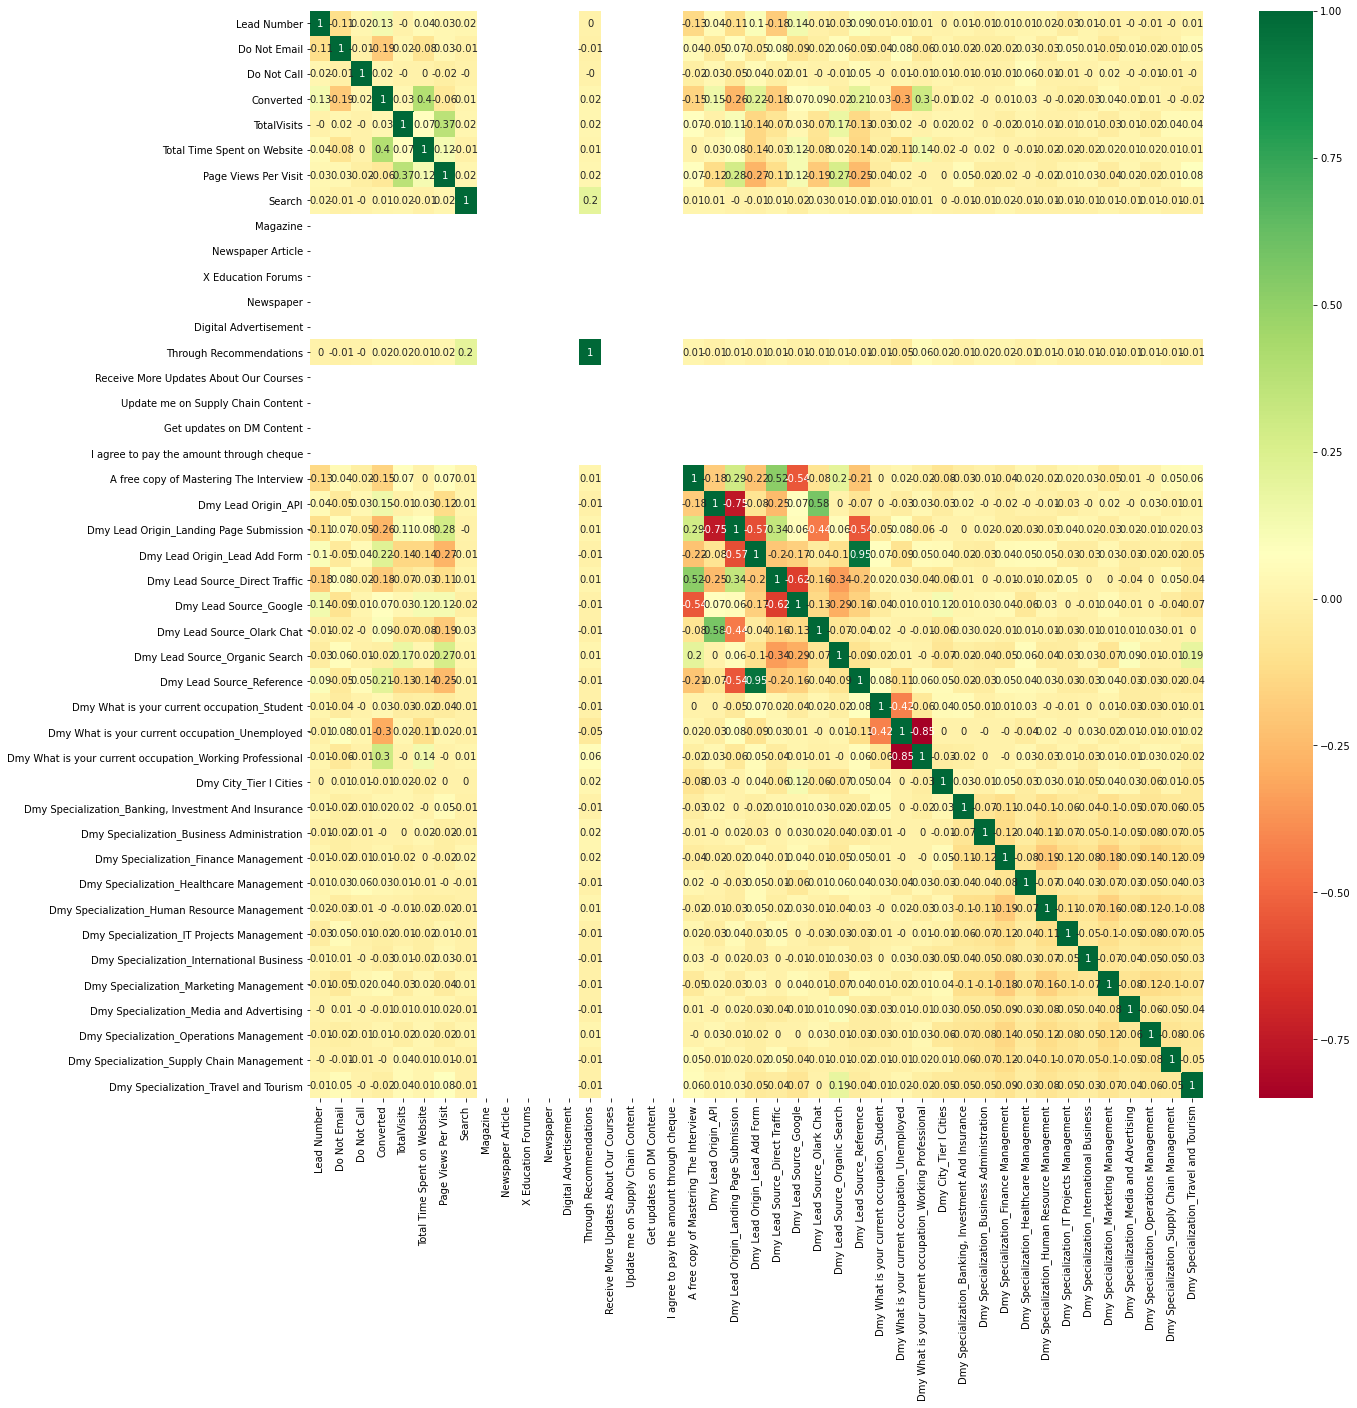

In [103]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(round(leads.corr(),2),cmap='RdYlGn',annot = True)
plt.show()

#### Compute correlation between features and target variable:

In [104]:
leads.corrwith(leads["Converted"]).shape

(43,)

In [105]:
len(leads.corrwith(leads["Converted"]))

43

In [106]:
leads.corr().shape

(43, 43)

In [107]:
leads.corrwith(leads["Converted"])

Lead Number                                                 0.129317
Do Not Email                                               -0.185910
Do Not Call                                                 0.022483
Converted                                                   1.000000
TotalVisits                                                 0.026350
Total Time Spent on Website                                 0.395680
Page Views Per Visit                                       -0.055500
Search                                                      0.007699
Magazine                                                         NaN
Newspaper Article                                                NaN
X Education Forums                                               NaN
Newspaper                                                        NaN
Digital Advertisement                                            NaN
Through Recommendations                                     0.021630
Receive More Updates About Our Cou

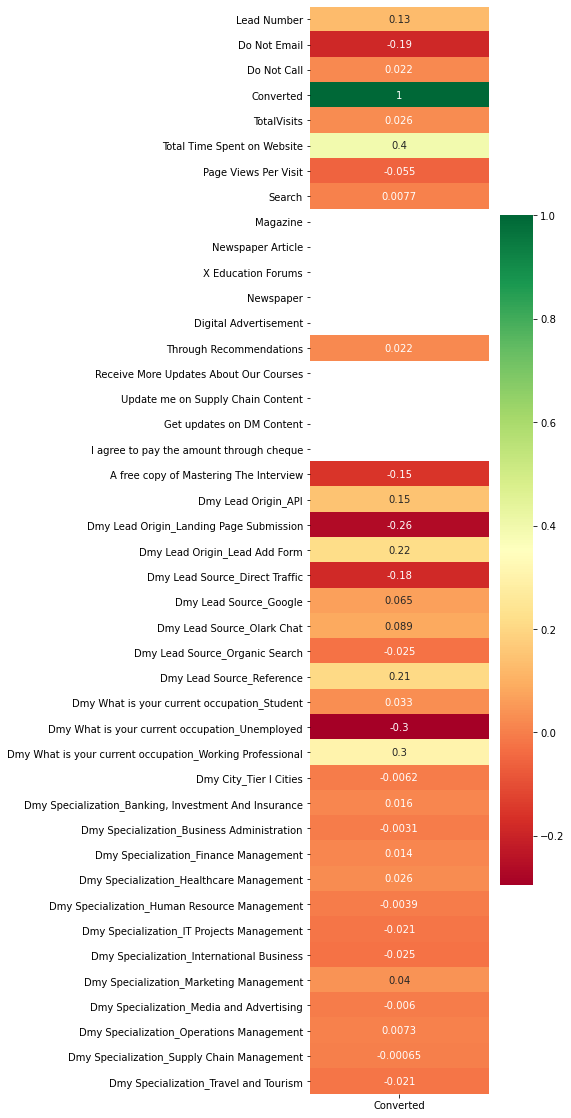

In [108]:
# Let's Visualize the correlation matrix with respected to TARGET variable 'Converted' to get business sense

# data = np.asarray(leads.corrwith(leads["Converted"])).reshape(len(leads.corrwith(leads["Converted"])),1)
data=leads.corr().loc[:,['Converted']]
plt.figure(figsize = (4,20))        # Size of the figure
sns.heatmap(data,cmap='RdYlGn',annot = True)
plt.show()

### Checking the Converted Percentage Rate : Class Balance and Imbalance


In [109]:
converted_percentage = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted_percentage

48.94647614434488

#### Inference:
in this case, we have about 48.9% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

## Test-Train Split

In [110]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Dmy Lead Origin_API',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Olark Chat',
       'Dmy Lead Source_Organic Search', 'Dmy Lead Source_Reference',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Unemployed',
       'Dmy What is your current occupation_Working Professional',
       'Dmy City_T

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
# Assigning feature variables to X:Note we are not performing inplace=True and thus telecom df still holds 'Churn' variable
X = leads.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head(1)

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
2             0            0          2.0                         1532   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
2                   2.0       0         0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
2                   0          0                      0   

   Through Recommendations  Receive More Updates About Our Courses  \
2                        0                                       0   

   Update me on Supply Chain Content  Get updates on DM Content  \
2                                  0                          0   

   I agree to pay the amount through cheque  \
2                                         0   

   A free copy of Mastering The Interview  Dmy Lead Origin_API  \
2                                       1                    0   

   Dmy Lead Origin_Landing Page Submission  Dmy Lead Origin_Lead Add Form  \
2                                        1                              0   

   Dmy Lead Source_Direct Traffic  Dmy Lead Source_Google  \
2                               1                       0   

   Dmy Lead Source_Olark Chat  Dmy Lead Source_Organic Search  \
2                           0                               0   

   Dmy Lead Source_Reference  Dmy What is your current occupation_Student  \
2                          0                                            1   

   Dmy What is your current occupation_Unemployed  \
2                                               0   

   Dmy What is your current occupation_Working Professional  \
2                                                  0          

   Dmy City_Tier I Cities  \
2                       1   

   Dmy Specialization_Banking, Investment And Insurance  \
2                                                  0      

   Dmy Specialization_Business Administration  \
2                                           1   

   Dmy Specialization_Finance Management  \
2                                      0   

   Dmy Specialization_Healthcare Management  \
2                                         0   

   Dmy Specialization_Human Resource Management  \
2                                             0   

   Dmy Specialization_IT Projects Management  \
2                                          0   

   Dmy Specialization_International Business  \
2                                          0   

   Dmy Specialization_Marketing Management  \
2                                        0   

   Dmy Specialization_Media and Advertising  \
2                                         0   

   Dmy Specialization_Operations Management  \
2                                         0   

   Dmy Specialization_Supply Chain Management  \
2                                           0   

   Dmy Specialization_Travel and Tourism  
2                                      0

In [113]:
#After dropping these three variables we have 41 variables to play with
X.shape

(4129, 41)

In [114]:
# Putting response variable to y
y = leads['Converted']

y.head()

2     1
3     0
6     1
10    1
11    1
Name: Converted, dtype: int64

In [115]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling
Here we use standardization scaling.
Standardization:x= x-mean(x)/sd(x). Here Mean=0 and sd=1

#### Standardising the train and test sets
'fit_transform' learns the mean and standard deviation from the train set and also applies on the train set, 'transform' just applies the mean and std deviation learnt from the train set on the test set. Thus we should use only 'transform' on the test set as we don't want the model to learn mean and std deviation from the test set.

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
X_train.head(1)

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
2121             0            0         16.0                         1804   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
2121                  2.67       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
2121                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
2121                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
2121                                  0                          0   

      I agree to pay the amount through cheque  \
2121                                         0   

      A free copy of Mastering The Interview  Dmy Lead Origin_API  \
2121                                       1                    0   

      Dmy Lead Origin_Landing Page Submission  Dmy Lead Origin_Lead Add Form  \
2121                                        1                              0   

      Dmy Lead Source_Direct Traffic  Dmy Lead Source_Google  \
2121                               0                       0   

      Dmy Lead Source_Olark Chat  Dmy Lead Source_Organic Search  \
2121                           0                               1   

      Dmy Lead Source_Reference  Dmy What is your current occupation_Student  \
2121                          0                                            0   

      Dmy What is your current occupation_Unemployed  \
2121                                               1   

      Dmy What is your current occupation_Working Professional  \
2121                                                  0          

      Dmy City_Tier I Cities  \
2121                       1   

      Dmy Specialization_Banking, Investment And Insurance  \
2121                                                  0      

      Dmy Specialization_Business Administration  \
2121                                           0   

      Dmy Specialization_Finance Management  \
2121                                      0   

      Dmy Specialization_Healthcare Management  \
2121                                         0   

      Dmy Specialization_Human Resource Management  \
2121                                             0   

      Dmy Specialization_IT Projects Management  \
2121                                          0   

      Dmy Specialization_International Business  \
2121                                          0   

      Dmy Specialization_Marketing Management  \
2121                                        1   

      Dmy Specialization_Media and Advertising  \
2121                                         0   

      Dmy Specialization_Operations Management  \
2121                                         0   

      Dmy Specialization_Supply Chain Management  \
2121                                           0   

      Dmy Specialization_Travel and Tourism  
2121                                      0

In [118]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head(1)

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
2121             0            0     2.757054                     2.044897   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
2121             -0.201372       0         0                  0   

      X Education Forums  Newspaper  Digital Advertisement  \
2121                   0          0                      0   

      Through Recommendations  Receive More Updates About Our Courses  \
2121                        0                                       0   

      Update me on Supply Chain Content  Get updates on DM Content  \
2121                                  0                          0   

      I agree to pay the amount through cheque  \
2121                                         0   

      A free copy of Mastering The Interview  Dmy Lead Origin_API  \
2121                                       1                    0   

      Dmy Lead Origin_Landing Page Submission  Dmy Lead Origin_Lead Add Form  \
2121                                        1                              0   

      Dmy Lead Source_Direct Traffic  Dmy Lead Source_Google  \
2121                               0                       0   

      Dmy Lead Source_Olark Chat  Dmy Lead Source_Organic Search  \
2121                           0                               1   

      Dmy Lead Source_Reference  Dmy What is your current occupation_Student  \
2121                          0                                            0   

      Dmy What is your current occupation_Unemployed  \
2121                                               1   

      Dmy What is your current occupation_Working Professional  \
2121                                                  0          

      Dmy City_Tier I Cities  \
2121                       1   

      Dmy Specialization_Banking, Investment And Insurance  \
2121                                                  0      

      Dmy Specialization_Business Administration  \
2121                                           0   

      Dmy Specialization_Finance Management  \
2121                                      0   

      Dmy Specialization_Healthcare Management  \
2121                                         0   

      Dmy Specialization_Human Resource Management  \
2121                                             0   

      Dmy Specialization_IT Projects Management  \
2121                                          0   

      Dmy Specialization_International Business  \
2121                                          0   

      Dmy Specialization_Marketing Management  \
2121                                        1   

      Dmy Specialization_Media and Advertising  \
2121                                         0   

      Dmy Specialization_Operations Management  \
2121                                         0   

      Dmy Specialization_Supply Chain Management  \
2121                                           0   

      Dmy Specialization_Travel and Tourism  
2121                                      0

In [119]:
# We have 41 variables to play with and a total of 2890 records in train set, after the split.
X_train.shape

(2890, 41)

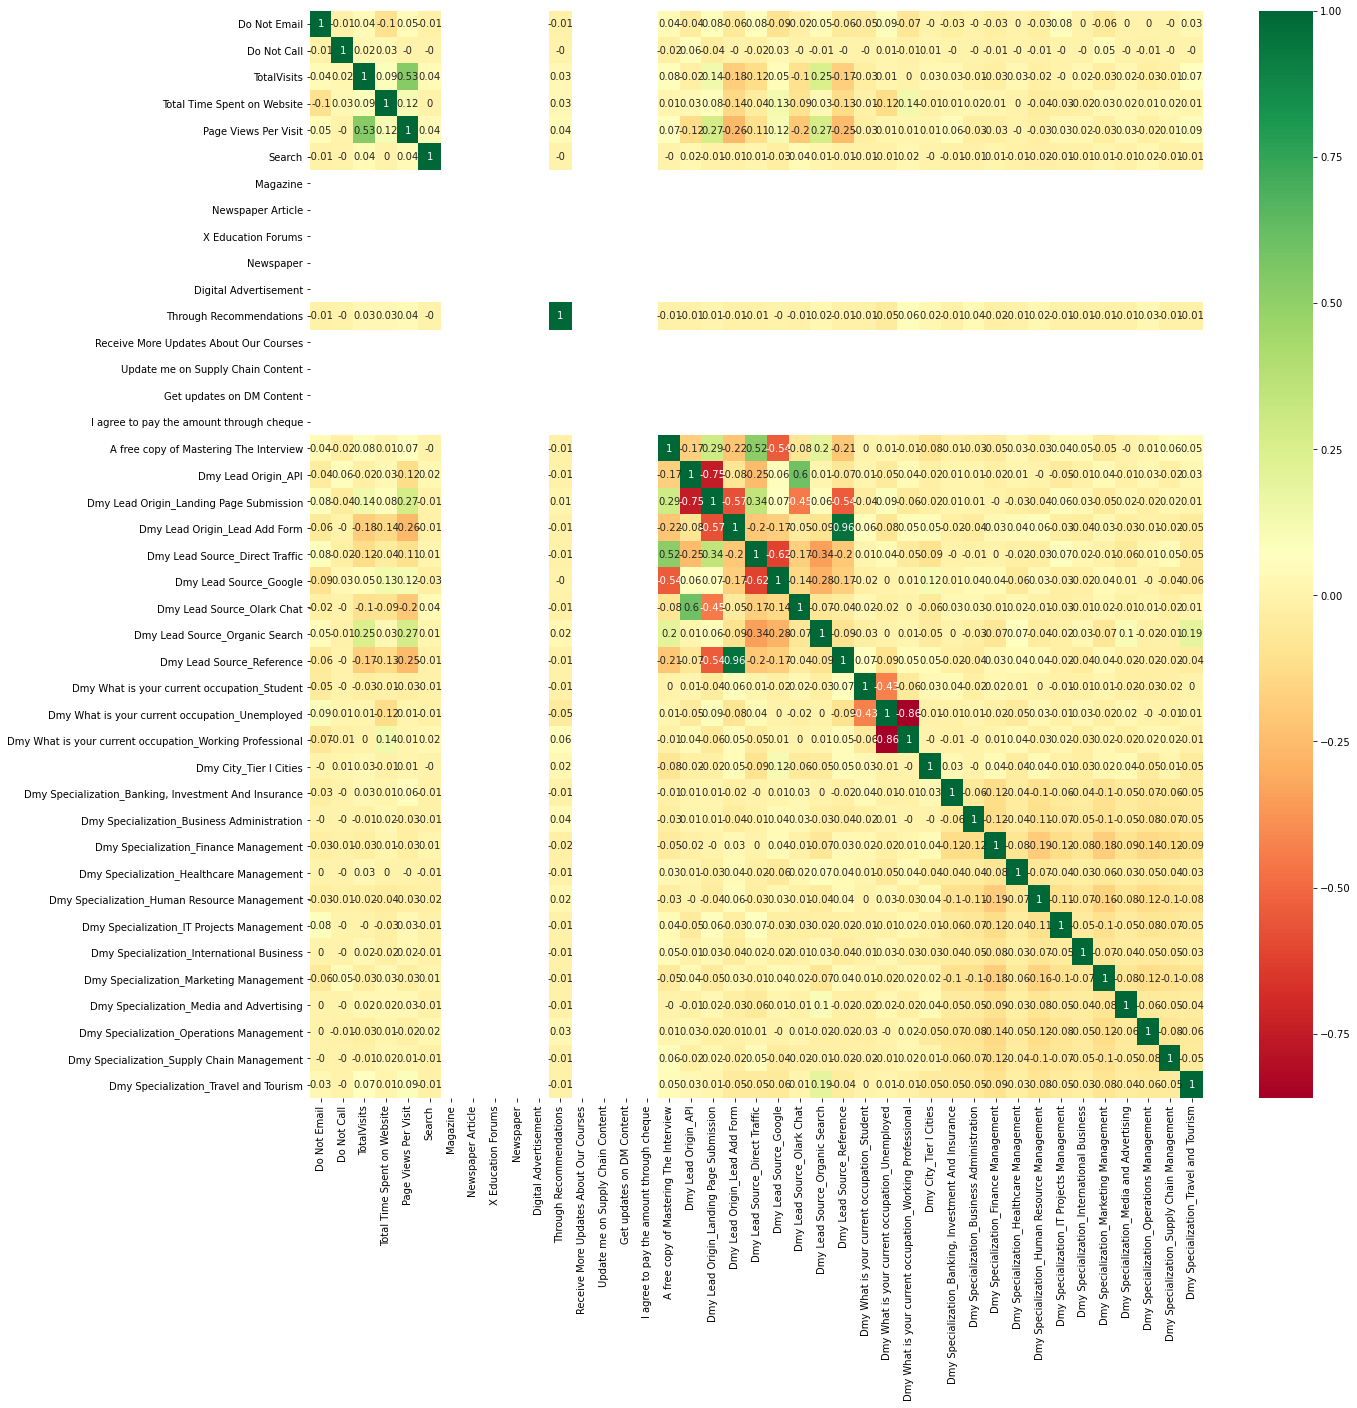

In [120]:
# Let's see the correlation matrix AFTER TRAIN TEST SPLIT WHICH WILL HAVE DUMMY FEATURES INCLUDED
plt.figure(figsize = (20,20))        # Size of the figure
sns.heatmap(round(X_train.corr(),2),cmap='RdYlGn',annot = True)
plt.show()

#### Inference: 
- 'Page View Per Visit' and 'Total Visits' are highly correlated, show casing multicollinearity, we could drop either of them.
- Similarly we can observe other variables which are highly correlated.

We could drop more features by just observing the correlations, but lets not do that, lets make the model do it for us.

## Model Building

### Running Your First Training Model

In [121]:
import statsmodels.api as sm

In [122]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2857
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1372.3
Date:                Wed, 12 Jan 2022   Deviance:                       2744.7
Time:                        23:55:09   Pearson chi2:                 3.57e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        2.6230      1.288      2.037      0.042       0.099       5.147
Do Not Email                                                -1.7586      0.252     -6.966      0.000      -2.253      -1.264
Do Not Call                                                 18.9859   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                                  0.1736      0.058      2.997      0.003       0.060       0.287
Total Time Spent on Website                                  1.0974      0.053     20.739      0.000       0.994       1.201
Page Views Per Visit                                        -0.0941      0.065     -1.441      0.150      -0.222       0.034
Search                                                       1.2324      1.427      0.864      0.388      -1.564       4.029
Magazine                                                 -8.944e-10    1.7e-06     -0.001      1.000   -3.33e-06    3.33e-06
Newspaper Article                                         1.681e-10   8.42e-07      0.000      1.000   -1.65e-06    1.65e-06
X Education Forums                                       -1.983e-10   5.16e-07     -0.000      1.000   -1.01e-06    1.01e-06
Newspaper                                                -8.376e-11   1.31e-07     -0.001      0.999   -2.56e-07    2.56e-07
Digital Advertisement                                    -2.842e-10   2.93e-07     -0.001      0.999   -5.74e-07    5.74e-07
Through Recommendations                                     19.5074   1.48e+04      0.001      0.999   -2.91e+04    2.91e+04
Receive More Updates About Our Courses                    2.982e-10   3.58e-07      0.001      0.999   -7.01e-07    7.01e-07
Update me on Supply Chain Content                        -3.114e-10   2.48e-07     -0.001      0.999   -4.87e-07    4.87e-07
Get updates on DM Content                                 9.604e-11    7.3e-08      0.001      0.999   -1.43e-07    1.43e-07
I agree to pay the amount through cheque                  2.701e-10    6.5e-07      0.000      1.000   -1.27e-06    1.27e-06
A free copy of Mastering The Interview                      -0.2826      0.128     -2.205      0.027      -0.534      -0.031
Dmy Lead Origin_API                                          0.0326      0.859      0.038      0.970      -1.650       1.715
Dmy Lead Origin_Landing Page Submission                     -0.8714      0.846     -1.030      0.303      -2.529       0.786
Dmy Lead Origin_Lead Add Form                                2.5707      1.239      2.075      0.038       0.142       4.999
Dmy Lead Source_Direct Traffic                              -0.7594      0.602     

#### Inference from above summary:
In this table, our key focus area is just the different coefficients and their respective p-values. As you can see, there are many variables whose p-values are high, implying that that variable is statistically insignificant. So we need to eliminate some of the variables in order to build a better model.

We'll first eliminate a few features using Recursive Feature Elimination (RFE), (coarse tuning automic) and once we have reached a small set of variables to work with, we can then use manual feature elimination(fine tuning-manual) (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [123]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [124]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output  (15 is, of course, an arbitrary number).
rfe = rfe.fit(X_train, y_train)

In [125]:
# Display/Visualize the RFE ranking values for each variable and sort them on RFE Ranking.
df_RFE = pd.DataFrame({'column_name': X_train.columns, 'rfe.support_':rfe.support_,'rfe.ranking_': rfe.ranking_})
df_RFE.sort_values('rfe.ranking_', ascending=False, inplace=True)
df_RFE

column_name  rfe.support_  \
12             Receive More Updates About Our Courses         False   
10                              Digital Advertisement         False   
15           I agree to pay the amount through cheque         False   
13                  Update me on Supply Chain Content         False   
8                                  X Education Forums         False   
9                                           Newspaper         False   
6                                            Magazine         False   
7                                   Newspaper Article         False   
14                          Get updates on DM Content         False   
33       Dmy Specialization_Human Resource Management         False   
28                             Dmy City_Tier I Cities         False   
1                                         Do Not Call         False   
31              Dmy Specialization_Finance Management         False   
30         Dmy Specialization_Business Administration         False   
35          Dmy Specialization_International Business         False   
34          Dmy Specialization_IT Projects Management         False   
39         Dmy Specialization_Supply Chain Management         False   
4                                Page Views Per Visit         False   
38           Dmy Specialization_Operations Management         False   
2                                         TotalVisits         False   
17                                Dmy Lead Origin_API         False   
37           Dmy Specialization_Media and Advertising         False   
36            Dmy Specialization_Marketing Management         False   
32           Dmy Specialization_Healthcare Management         False   
16             A free copy of Mastering The Interview         False   
11                            Through Recommendations         False   
0                                        Do Not Email          True   
29  Dmy Specialization_Banking, Investment And Ins...          True   
20                     Dmy Lead Source_Direct Traffic          True   
27  Dmy What is your current occupation_Working Pr...          True   
26     Dmy What is your current occupation_Unemployed          True   
25        Dmy What is your current occupation_Student          True   
24                          Dmy Lead Source_Reference          True   
23                     Dmy Lead Source_Organic Search          True   
22                         Dmy Lead Source_Olark Chat          True   
21                             Dmy Lead Source_Google          True   
19                      Dmy Lead Origin_Lead Add Form          True   
18            Dmy Lead Origin_Landing Page Submission          True   
5                                              Search          True   
3                         Total Time Spent on Website          True   
40              Dmy Specialization_Travel and Tourism          True   

    rfe.ranking_  
12            27  
10            26  
15            25  
13            24  
8             23  
9             22  
6             21  
7             20  
14            19  
33            18  
28            17  
1             16  
31            15  
30            14  
35            13  
34            12  
39            11  
4             10  
38             9  
2              8  
17             7  
37             6  
36             5  
32             4  
16             3  
11             2  
0              1  
29             1  
20             1  
27             1  
26             1  
25             1  
24             1  
23             1  
22             1  
21             1  
19             1  
18             1  
5              1  
3              1  
40             1

In [126]:
#variables which rfe suggests us to include in the model:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Olark Chat',
       'Dmy Lead Source_Organic Search', 'Dmy Lead Source_Reference',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Unemployed',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [127]:
#
col.shape

(15,)

In [128]:
#variables which rfe suggests us to exclude in the model:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Dmy Lead Origin_API',
       'Dmy City_Tier I Cities', 'Dmy Specialization_Business Administration',
       'Dmy Specialization_Finance Management',
       'Dmy Specialization_Healthcare Management',
       'Dmy Specialization_Human Resource Management',
       'Dmy Specialization_IT Projects Management',
       'Dmy Specialization_International Business',
       'Dmy Specialization_Marketing Management',
       'Dmy Specialization_Media and Advertising',
       'Dmy Specialization_Operations Management',
       'Dmy Specialization_Supply Chain Management'],
      dtype='obje

#### Inference:or Doubt to ask?
- Upgrad solution had "Total Visits" in its final model contributing to model explanation.
- In my solution "TotalVisits" is removed as RFE suggested it to remove it.

#### Assessing the model with StatsModels:using the 15 columns/variables given to us by RFE

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #
#'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data
#(i.e. in which the target will have just two classes, here 'Hot Lead' and 'Cold Lead').
lor_model = logm2.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2874
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1382.8
Date:                Wed, 12 Jan 2022   Deviance:                       2765.7
Time:                        23:55:10   Pearson chi2:                 3.63e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        3.1079      1.223      2.541      0.011       0.710       5.506
Do Not Email                                                -1.7081      0.247     -6.910      0.000      -2.193      -1.224
Total Time Spent on Website                                  1.0925      0.052     20.857      0.000       0.990       1.195
Search                                                       1.2739      1.402      0.909      0.364      -1.474       4.022
Dmy Lead Origin_Landing Page Submission                     -0.9492      0.210     -4.513      0.000      -1.361      -0.537
Dmy Lead Origin_Lead Add Form                                2.5240      1.096      2.304      0.021       0.377       4.671
Dmy Lead Source_Direct Traffic                              -0.9343      0.441     -2.119      0.034      -1.798      -0.070
Dmy Lead Source_Google                                      -0.6336      0.437     -1.450      0.147      -1.490       0.223
Dmy Lead Source_Olark Chat                                   0.4195      0.487      0.862      0.389      -0.535       1.374
Dmy Lead Source_Organic Search                              -0.7969      0.451     -1.767      0.077      -1.681       0.087
Dmy Lead Source_Reference                                   -0.1886      1.143     -0.165      0.869      -2.428       2.051
Dmy What is your current occupation_Student                 -1.4407      1.180     -1.220      0.222      -3.754       0.873
Dmy What is your current occupation_Unemployed              -1.8791      1.151     -1.632      0.103      -4.136       0.377
Dmy What is your current occupation_Working Professional     0.9825      1.175      0.836      0.403      -1.321       3.286
Dmy Specialization_Banking, Investment And Insurance         0.3539      0.200      1.767      0.077      -0.039       0.747
Dmy Specialization_Travel and Tourism                        0.3412      0.248      1.374      0.169      -0.146       0.828
============================================================================================================================
"""

#### Observations and Explanation:
Here, you use the GLM (Generalized Linear Models) method of the library statsmodels. 'Binomial()' in the 'family' argument tells statsmodels that it needs to fit a logit curve to a binomial data (i.e. in which the target will have just two classes, here 'Hot Lead' and 'Cold Lead').

Now, recall that the logistic regression curve gives you the probabilities of churning and not churning. You can get these probabilities by simply using the 'predict' function as shown in the notebook.

Since the logistic curve gives you just the probabilities and not the actual classification of 'Churn' and 'Non-Churn', you need to find a threshold probability to classify customers as 'churn' and 'non-churn'. Here, we choose 0.5 as an arbitrary cutoff wherein if the probability of a particular customer churning is less than 0.5, you'd classify it as 'Non-Churn' and if it's greater than 0.5, you'd classify it as 'Churn'. The choice of 0.5 is completely arbitrary at this stage and you'll learn how to find the optimal cutoff in 'Model Evaluation', but for now, we'll move forward with 0.5 as the cutoff.

#### Manual Algorithm of chossing which variables to drop first:
- 1. High p-value, High VIF: Discard the vars which have these first
- 2. High p-value, Low VIF: Discard the var which has High P-value first as the VIFs of all other vars change after dropping var which High p-value
- 3. Low p-value, High VIF: Discard the var which has High VIF, and than one with Low p-value.
- 4. Low p-value, Low VIF: Keep the variable in the model as its significant.

#### Why is `Value 5` chosen as the threshold to include vars with VIF value lesses than 5 into the model?
VIF= 1/(1-Rsquared)
5=1/(1-Rsquared)
Solving above equantion we derive Rsquared value to be 0.8 which implies a VIF value of 5 corresponds to Rsquared value of 80% which is huge, which means that var is able to explain 80% of the linear correlation with target variable. Thus we choose `value 5` as threshold.
- VIF Value >5 shoudn't be ignored and inspected.
- VIF value >10 is definetly high and the Var can be eliminated/dropped from the model
- if VIF value<5, include the corresponding var/feature into building the LR model

#### p-value Threshold is 0.05.
- 1. If (p<0.05): p-value is low, Reject null hypothesis and treat variable as significant and keep it in the model
- 2. If (p>0.05):p-value is high, Fail to reject null hypothesis and treat variable as insignificant and discard it from model

#### General Rule: 
p_value<0.05 is non-negotiable, but VIF value>5 can be tolerated if the business demands the particular variable to be present in the model

In [130]:
# Getting the predicted values on the train set
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred[:10]

2121    0.847706
7074    0.583844
7252    0.204826
2367    0.707872
1197    0.551553
6662    0.610532
4083    0.220262
1639    0.492717
4216    0.939612
4672    0.180085
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.84770645, 0.58384374, 0.20482557, 0.70787164, 0.55155338,
       0.6105323 , 0.22026235, 0.49271663, 0.93961153, 0.18008503])

#### Creating a dataframe with the actual churn flag and the predicted probabilities:

In [132]:
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID
0     1   0.847706         2121
1     0   0.583844         7074
2     0   0.204826         7252
3     1   0.707872         2367
4     0   0.551553         1197

#### Creating new column 'predicted' with 1 if Lead_Prob > 0.5 else 0¶

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.847706         2121          1
1     0   0.583844         7074          1
2     0   0.204826         7252          0
3     1   0.707872         2367          1
4     0   0.551553         1197          1

### Confusion Matrix and Accuracy¶

In [134]:
from sklearn import metrics

In [135]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1203  281]
 [ 328 1078]]


In [136]:
# Predicted     cold_lead    hot_lead
# Actual
# cold_lead        1203      281
# hot_lead         328       1078  

In [137]:
# Let's check the overall accuracy. : 0.8102397399431126
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7892733564013841


#### Checking VIFs

In [138]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [139]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
11     Dmy What is your current occupation_Unemployed  58.46
5                      Dmy Lead Source_Direct Traffic  31.04
6                              Dmy Lead Source_Google  24.15
3             Dmy Lead Origin_Landing Page Submission  15.98
4                       Dmy Lead Origin_Lead Add Form  14.67
9                           Dmy Lead Source_Reference  12.43
8                      Dmy Lead Source_Organic Search   9.94
12  Dmy What is your current occupation_Working Pr...   7.83
7                          Dmy Lead Source_Olark Chat   3.34
10        Dmy What is your current occupation_Student   2.93
0                                        Do Not Email   1.12
1                         Total Time Spent on Website   1.08
14              Dmy Specialization_Travel and Tourism   1.08
13  Dmy Specialization_Banking, Investment And Ins...   1.07
2                                              Search   1.00

There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Dmy What is your current occupation_Unemployed' has the highest VIF. However 'Dmy Lead Source_Reference' has the highest p_value, (of 0.869) Thus we drop this variable compared to the variable which as high VIF.

In [140]:
#set_trace()

#### Feature Engineering both from technical perspective and business perspective:

We choose to drop 'Dmy What is your current occupation_Unemployed' variable as it as high VIF and its correlated with 'Working Professional' So we try to work towards keeping either of them.

In [141]:

col = col.drop('Dmy What is your current occupation_Unemployed', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Olark Chat',
       'Dmy Lead Source_Organic Search', 'Dmy Lead Source_Reference',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [142]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm3.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2875
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.6
Date:                Wed, 12 Jan 2022   Deviance:                       2769.3
Time:                        23:55:11   Pearson chi2:                 3.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.2380      0.423      2.927      0.003       0.409       2.067
Do Not Email                                                -1.7140      0.247     -6.932      0.000      -2.199      -1.229
Total Time Spent on Website                                  1.0921      0.052     20.861      0.000       0.989       1.195
Search                                                       1.2671      1.403      0.903      0.366      -1.482       4.016
Dmy Lead Origin_Landing Page Submission                     -0.9732      0.210     -4.639      0.000      -1.384      -0.562
Dmy Lead Origin_Lead Add Form                                2.5062      1.095      2.288      0.022       0.359       4.653
Dmy Lead Source_Direct Traffic                              -0.9148      0.441     -2.075      0.038      -1.779      -0.051
Dmy Lead Source_Google                                      -0.6196      0.437     -1.418      0.156      -1.476       0.237
Dmy Lead Source_Olark Chat                                   0.4296      0.487      0.883      0.377      -0.524       1.383
Dmy Lead Source_Organic Search                              -0.7672      0.451     -1.702      0.089      -1.651       0.116
Dmy Lead Source_Reference                                   -0.1563      1.142     -0.137      0.891      -2.394       2.082
Dmy What is your current occupation_Student                  0.4333      0.270      1.606      0.108      -0.096       0.962
Dmy What is your current occupation_Working Professional     2.8569      0.247     11.547      0.000       2.372       3.342
Dmy Specialization_Banking, Investment And Insurance         0.3484      0.200      1.739      0.082      -0.044       0.741
Dmy Specialization_Travel and Tourism                        0.3315      0.248      1.335      0.182      -0.155       0.818
============================================================================================================================
"""

In [143]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.849512         2121          1
1     0   0.584901         7074          1
2     0   0.204767         7252          0
3     1   0.707626         2367          1
4     0   0.552642         1197          1

In [144]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1199  285]
 [ 330 1076]]


In [145]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.78719723183391


So overall the accuracy hasn't dropped much.

#### Let's check the VIFs again

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             Dmy Lead Origin_Landing Page Submission  15.21
9                           Dmy Lead Source_Reference  12.32
4                       Dmy Lead Origin_Lead Add Form  12.31
5                      Dmy Lead Source_Direct Traffic   8.67
6                              Dmy Lead Source_Google   5.88
8                      Dmy Lead Source_Organic Search   3.03
11  Dmy What is your current occupation_Working Pr...   1.15
0                                        Do Not Email   1.12
1                         Total Time Spent on Website   1.08
13              Dmy Specialization_Travel and Tourism   1.08
12  Dmy Specialization_Banking, Investment And Ins...   1.07
10        Dmy What is your current occupation_Student   1.04
7                          Dmy Lead Source_Olark Chat   1.03
2                                              Search   1.00

In [147]:
#set_trace()

In [148]:
#Let's drop 'Dmy Lead Source_Reference' since it has a high p_value(0.891) and also high vif(12.32). Also if we 
#delete this variable, we must work towards keeping 'Lead Source Direct Traffic' in our model as they are correlated.
col = col.drop('Dmy Lead Source_Reference')
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Search',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Olark Chat',
       'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [149]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2876
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1384.7
Date:                Wed, 12 Jan 2022   Deviance:                       2769.3
Time:                        23:55:11   Pearson chi2:                 3.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.2289      0.417      2.947      0.003       0.412       2.046
Do Not Email                                                -1.7141      0.247     -6.932      0.000      -2.199      -1.229
Total Time Spent on Website                                  1.0920      0.052     20.863      0.000       0.989       1.195
Search                                                       1.2669      1.403      0.903      0.366      -1.482       4.016
Dmy Lead Origin_Landing Page Submission                     -0.9746      0.210     -4.651      0.000      -1.385      -0.564
Dmy Lead Origin_Lead Add Form                                2.3761      0.528      4.500      0.000       1.341       3.411
Dmy Lead Source_Direct Traffic                              -0.9040      0.433     -2.089      0.037      -1.752      -0.056
Dmy Lead Source_Google                                      -0.6090      0.429     -1.419      0.156      -1.450       0.232
Dmy Lead Source_Olark Chat                                   0.4387      0.481      0.911      0.362      -0.505       1.382
Dmy Lead Source_Organic Search                              -0.7568      0.443     -1.707      0.088      -1.626       0.112
Dmy What is your current occupation_Student                  0.4326      0.270      1.603      0.109      -0.096       0.962
Dmy What is your current occupation_Working Professional     2.8568      0.247     11.547      0.000       2.372       3.342
Dmy Specialization_Banking, Investment And Insurance         0.3481      0.200      1.737      0.082      -0.045       0.741
Dmy Specialization_Travel and Tourism                        0.3315      0.248      1.335      0.182      -0.155       0.818
============================================================================================================================
"""

In [150]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.849475         2121          1
1     0   0.584937         7074          1
2     0   0.204785         7252          0
3     1   0.707602         2367          1
4     0   0.552682         1197          1

In [151]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1199  285]
 [ 330 1076]]


In [152]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.78719723183391


So overall the accuracy hasn't dropped much.
#### Lets Check the VIF again:

In [153]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3             Dmy Lead Origin_Landing Page Submission  15.16
5                      Dmy Lead Source_Direct Traffic   8.63
6                              Dmy Lead Source_Google   5.85
8                      Dmy Lead Source_Organic Search   3.02
10  Dmy What is your current occupation_Working Pr...   1.15
0                                        Do Not Email   1.12
1                         Total Time Spent on Website   1.08
12              Dmy Specialization_Travel and Tourism   1.08
11  Dmy Specialization_Banking, Investment And Ins...   1.07
4                       Dmy Lead Origin_Lead Add Form   1.05
9         Dmy What is your current occupation_Student   1.04
7                          Dmy Lead Source_Olark Chat   1.03
2                                              Search   1.00

In [154]:
#set_trace()

In [155]:
# Let's drop 'Search' since it has a high p_value(0.366), even if it has low vif(1.00)
#Also from business perspective capturing info from this variable doesn't add much meaning
col = col.drop('Search')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Olark Chat',
       'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [156]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2877
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.1
Date:                Wed, 12 Jan 2022   Deviance:                       2770.2
Time:                        23:55:11   Pearson chi2:                 3.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.2289      0.417      2.947      0.003       0.412       2.046
Do Not Email                                                -1.7160      0.247     -6.941      0.000      -2.201      -1.231
Total Time Spent on Website                                  1.0922      0.052     20.866      0.000       0.990       1.195
Dmy Lead Origin_Landing Page Submission                     -0.9737      0.210     -4.647      0.000      -1.384      -0.563
Dmy Lead Origin_Lead Add Form                                2.3765      0.528      4.500      0.000       1.341       3.412
Dmy Lead Source_Direct Traffic                              -0.9020      0.433     -2.084      0.037      -1.750      -0.054
Dmy Lead Source_Google                                      -0.6096      0.429     -1.421      0.155      -1.451       0.231
Dmy Lead Source_Olark Chat                                   0.4401      0.481      0.914      0.361      -0.503       1.384
Dmy Lead Source_Organic Search                              -0.7539      0.443     -1.700      0.089      -1.623       0.115
Dmy What is your current occupation_Student                  0.4310      0.270      1.597      0.110      -0.098       0.960
Dmy What is your current occupation_Working Professional     2.8559      0.247     11.545      0.000       2.371       3.341
Dmy Specialization_Banking, Investment And Insurance         0.3463      0.200      1.728      0.084      -0.046       0.739
Dmy Specialization_Travel and Tourism                        0.3290      0.248      1.325      0.185      -0.158       0.816
============================================================================================================================
"""

In [157]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.850026         2121          1
1     0   0.585701         7074          1
2     0   0.204808         7252          0
3     1   0.707729         2367          1
4     0   0.553453         1197          1

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1199  285]
 [ 330 1076]]


In [159]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.78719723183391


#### Lets Check VIF Again:

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2             Dmy Lead Origin_Landing Page Submission  15.16
4                      Dmy Lead Source_Direct Traffic   8.63
5                              Dmy Lead Source_Google   5.85
7                      Dmy Lead Source_Organic Search   3.02
9   Dmy What is your current occupation_Working Pr...   1.15
0                                        Do Not Email   1.12
1                         Total Time Spent on Website   1.08
11              Dmy Specialization_Travel and Tourism   1.08
10  Dmy Specialization_Banking, Investment And Ins...   1.07
3                       Dmy Lead Origin_Lead Add Form   1.05
8         Dmy What is your current occupation_Student   1.04
6                          Dmy Lead Source_Olark Chat   1.03

In [161]:
# Let's drop 'Dmy Lead Source_Olark Chat' since it has a high p_value(0.362), even if it has low vif(1.03)

col = col.drop('Dmy Lead Source_Olark Chat')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Landing Page Submission',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [162]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2878
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1385.5
Date:                Wed, 12 Jan 2022   Deviance:                       2771.0
Time:                        23:55:11   Pearson chi2:                 3.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.5583      0.213      7.324      0.000       1.141       1.975
Do Not Email                                                -1.7133      0.247     -6.943      0.000      -2.197      -1.230
Total Time Spent on Website                                  1.0912      0.052     20.854      0.000       0.989       1.194
Dmy Lead Origin_Landing Page Submission                     -1.0072      0.207     -4.869      0.000      -1.413      -0.602
Dmy Lead Origin_Lead Add Form                                2.0628      0.401      5.143      0.000       1.277       2.849
Dmy Lead Source_Direct Traffic                              -1.1984      0.288     -4.166      0.000      -1.762      -0.635
Dmy Lead Source_Google                                      -0.9091      0.278     -3.267      0.001      -1.454      -0.364
Dmy Lead Source_Organic Search                              -1.0540      0.299     -3.525      0.000      -1.640      -0.468
Dmy What is your current occupation_Student                  0.4357      0.270      1.616      0.106      -0.093       0.964
Dmy What is your current occupation_Working Professional     2.8557      0.247     11.541      0.000       2.371       3.341
Dmy Specialization_Banking, Investment And Insurance         0.3518      0.200      1.759      0.079      -0.040       0.744
Dmy Specialization_Travel and Tourism                        0.3349      0.248      1.351      0.177      -0.151       0.821
============================================================================================================================
"""

In [163]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.849227         2121          1
1     0   0.585367         7074          1
2     0   0.204364         7252          0
3     1   0.706747         2367          1
4     0   0.553142         1197          1

In [164]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1194  290]
 [ 323 1083]]


In [165]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7878892733564014


#### Lets Check VIF Again:

In [166]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2             Dmy Lead Origin_Landing Page Submission  15.16
4                      Dmy Lead Source_Direct Traffic   8.62
5                              Dmy Lead Source_Google   5.85
6                      Dmy Lead Source_Organic Search   3.02
8   Dmy What is your current occupation_Working Pr...   1.14
0                                        Do Not Email   1.12
10              Dmy Specialization_Travel and Tourism   1.08
1                         Total Time Spent on Website   1.07
9   Dmy Specialization_Banking, Investment And Ins...   1.06
3                       Dmy Lead Origin_Lead Add Form   1.05
7         Dmy What is your current occupation_Student   1.04

In [167]:

# Let's drop 'Dmy Lead Origin_Landing Page Submission' since it has a high VIF(15.16), even if it has low p_value(0.00)
#From business perspective if we drop this, we need to work towards keeping 'Lead Origin Lead Add Form' in our model
#as they are highly correlated and capture kind of same information into the model
col = col.drop('Dmy Lead Origin_Landing Page Submission')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance',
       'Dmy Specialization_Travel and Tourism'],
      dtype='object')

In [168]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2879
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1398.0
Date:                Wed, 12 Jan 2022   Deviance:                       2796.0
Time:                        23:55:12   Pearson chi2:                 3.69e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.4594      0.210      6.955      0.000       1.048       1.871
Do Not Email                                                -1.7111      0.244     -7.003      0.000      -2.190      -1.232
Total Time Spent on Website                                  1.0953      0.052     21.027      0.000       0.993       1.197
Dmy Lead Origin_Lead Add Form                                2.2325      0.401      5.568      0.000       1.447       3.018
Dmy Lead Source_Direct Traffic                              -2.0975      0.221     -9.501      0.000      -2.530      -1.665
Dmy Lead Source_Google                                      -1.7089      0.223     -7.656      0.000      -2.146      -1.271
Dmy Lead Source_Organic Search                              -1.8659      0.247     -7.569      0.000      -2.349      -1.383
Dmy What is your current occupation_Student                  0.4394      0.268      1.638      0.102      -0.086       0.965
Dmy What is your current occupation_Working Professional     2.8526      0.247     11.562      0.000       2.369       3.336
Dmy Specialization_Banking, Investment And Insurance         0.3467      0.199      1.746      0.081      -0.043       0.736
Dmy Specialization_Travel and Tourism                        0.3336      0.246      1.357      0.175      -0.148       0.815
============================================================================================================================
"""

In [169]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.862152         2121          1
1     0   0.588501         7074          1
2     0   0.221936         7252          0
3     1   0.729648         2367          1
4     0   0.556213         1197          1

In [170]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1195  289]
 [ 328 1078]]


In [171]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7865051903114186


#### Lets Check VIF Again:

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                     Dmy Lead Source_Direct Traffic  1.16
7  Dmy What is your current occupation_Working Pr...  1.14
0                                       Do Not Email  1.12
5                     Dmy Lead Source_Organic Search  1.12
4                             Dmy Lead Source_Google  1.10
9              Dmy Specialization_Travel and Tourism  1.08
1                        Total Time Spent on Website  1.06
8  Dmy Specialization_Banking, Investment And Ins...  1.06
2                      Dmy Lead Origin_Lead Add Form  1.05
6        Dmy What is your current occupation_Student  1.04

In [173]:
#We are almost there with our final model, just need to remove ones with high p_value now.
# Let's drop 'Dmy Specialization_Travel and Tourism' since it has a high p_value(0.175)

col = col.drop('Dmy Specialization_Travel and Tourism')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Student',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance'],
      dtype='object')

In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2880
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1398.9
Date:                Wed, 12 Jan 2022   Deviance:                       2797.9
Time:                        23:55:12   Pearson chi2:                 3.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.4736      0.210      7.030      0.000       1.063       1.884
Do Not Email                                                -1.7007      0.244     -6.973      0.000      -2.179      -1.223
Total Time Spent on Website                                  1.0946      0.052     21.023      0.000       0.993       1.197
Dmy Lead Origin_Lead Add Form                                2.2181      0.401      5.533      0.000       1.432       3.004
Dmy Lead Source_Direct Traffic                              -2.1028      0.221     -9.526      0.000      -2.536      -1.670
Dmy Lead Source_Google                                      -1.7153      0.223     -7.686      0.000      -2.153      -1.278
Dmy Lead Source_Organic Search                              -1.8347      0.245     -7.481      0.000      -2.315      -1.354
Dmy What is your current occupation_Student                  0.4457      0.268      1.661      0.097      -0.080       0.972
Dmy What is your current occupation_Working Professional     2.8468      0.247     11.544      0.000       2.363       3.330
Dmy Specialization_Banking, Investment And Insurance         0.3322      0.198      1.676      0.094      -0.056       0.721
============================================================================================================================
"""

In [175]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.867288         2121          1
1     0   0.590479         7074          1
2     0   0.223385         7252          0
3     1   0.731006         2367          1
4     0   0.558251         1197          1

In [176]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1197  287]
 [ 327 1079]]


In [177]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7875432525951557


#### Lets Check VIF Again:

In [178]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                     Dmy Lead Source_Direct Traffic  1.15
7  Dmy What is your current occupation_Working Pr...  1.14
0                                       Do Not Email  1.12
4                             Dmy Lead Source_Google  1.10
1                        Total Time Spent on Website  1.06
8  Dmy Specialization_Banking, Investment And Ins...  1.06
2                      Dmy Lead Origin_Lead Add Form  1.05
5                     Dmy Lead Source_Organic Search  1.05
6        Dmy What is your current occupation_Student  1.04

In [179]:
# Let's drop 'Dmy What is your current occupation_Student' since it has a high p_Value(0.097)

col = col.drop('Dmy What is your current occupation_Student')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Working Professional',
       'Dmy Specialization_Banking, Investment And Insurance'],
      dtype='object')

In [180]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2881
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1400.3
Date:                Wed, 12 Jan 2022   Deviance:                       2800.6
Time:                        23:55:12   Pearson chi2:                 3.68e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.4911      0.209      7.125      0.000       1.081       1.901
Do Not Email                                                -1.7146      0.244     -7.037      0.000      -2.192      -1.237
Total Time Spent on Website                                  1.0940      0.052     21.022      0.000       0.992       1.196
Dmy Lead Origin_Lead Add Form                                2.2305      0.400      5.569      0.000       1.446       3.015
Dmy Lead Source_Direct Traffic                              -2.1035      0.221     -9.535      0.000      -2.536      -1.671
Dmy Lead Source_Google                                      -1.7204      0.223     -7.714      0.000      -2.157      -1.283
Dmy Lead Source_Organic Search                              -1.8436      0.245     -7.524      0.000      -2.324      -1.363
Dmy What is your current occupation_Working Professional     2.8330      0.246     11.495      0.000       2.350       3.316
Dmy Specialization_Banking, Investment And Insurance         0.3438      0.198      1.738      0.082      -0.044       0.731
============================================================================================================================
"""

In [181]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.868150         2121          1
1     0   0.594420         7074          1
2     0   0.225637         7252          0
3     1   0.733325         2367          1
4     0   0.562289         1197          1

In [182]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1197  287]
 [ 328 1078]]


In [183]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.78719723183391


#### Lets Check VIF Again:

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6  Dmy What is your current occupation_Working Pr...  1.14
3                     Dmy Lead Source_Direct Traffic  1.13
0                                       Do Not Email  1.11
4                             Dmy Lead Source_Google  1.09
1                        Total Time Spent on Website  1.06
7  Dmy Specialization_Banking, Investment And Ins...  1.06
5                     Dmy Lead Source_Organic Search  1.05
2                      Dmy Lead Origin_Lead Add Form  1.04

In [185]:
# Let's drop 'Dmy Specialization_Banking, Investment And Insurance' since it has a high p_value(0.082),

col = col.drop('Dmy Specialization_Banking, Investment And Insurance')
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Dmy Lead Origin_Lead Add Form', 'Dmy Lead Source_Direct Traffic',
       'Dmy Lead Source_Google', 'Dmy Lead Source_Organic Search',
       'Dmy What is your current occupation_Working Professional'],
      dtype='object')

In [186]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lor_model = logm4.fit()
lor_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2890
Model:                            GLM   Df Residuals:                     2882
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1401.8
Date:                Wed, 12 Jan 2022   Deviance:                       2803.6
Time:                        23:55:12   Pearson chi2:                 3.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                        1.5127      0.209      7.244      0.000       1.103       1.922
Do Not Email                                                -1.7219      0.243     -7.078      0.000      -2.199      -1.245
Total Time Spent on Website                                  1.0928      0.052     21.019      0.000       0.991       1.195
Dmy Lead Origin_Lead Add Form                                2.2188      0.400      5.543      0.000       1.434       3.003
Dmy Lead Source_Direct Traffic                              -2.1043      0.220     -9.547      0.000      -2.536      -1.672
Dmy Lead Source_Google                                      -1.7215      0.223     -7.726      0.000      -2.158      -1.285
Dmy Lead Source_Organic Search                              -1.8426      0.245     -7.525      0.000      -2.323      -1.363
Dmy What is your current occupation_Working Professional     2.8259      0.246     11.474      0.000       2.343       3.309
============================================================================================================================
"""

#### Upgrad Solution Final Feature Set Image below:

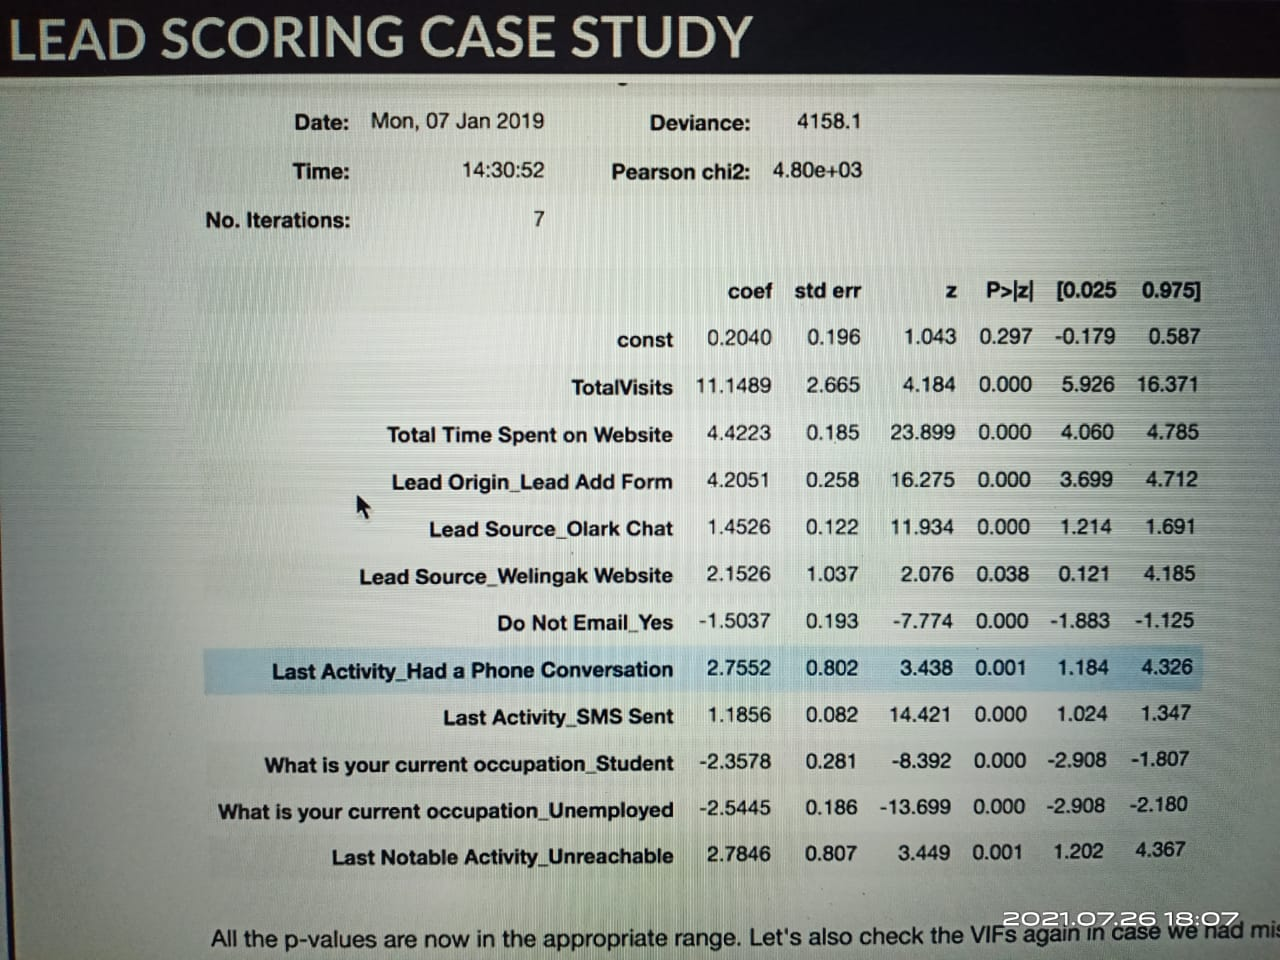

In [187]:
# Getting the predicted values on the train set again
y_train_pred = lor_model.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Lead':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
# y_train_pred_final.head()
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted
0     1   0.870414         2121          1
1     0   0.599138         7074          1
2     0   0.229431         7252          0
3     1   0.737018         2367          1
4     0   0.567146         1197          1

In [188]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.predicted )
print(confusion)

[[1196  288]
 [ 331 1075]]


In [189]:
# Let's check the overall accuracy. : 
print(metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.predicted))

0.7858131487889274


#### Lets Check VIF Again:

In [190]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6  Dmy What is your current occupation_Working Pr...  1.14
0                                       Do Not Email  1.11
3                     Dmy Lead Source_Direct Traffic  1.11
4                             Dmy Lead Source_Google  1.07
1                        Total Time Spent on Website  1.06
2                      Dmy Lead Origin_Lead Add Form  1.04
5                     Dmy Lead Source_Organic Search  1.04

## FEATURE SELECTION INFERENCE:
- We will work with this model obtained as all constraints on vif and p_value are satisfied
- The top three variables which have positive coefficient and make the lead a hot lead are:
    - Dmy What is your current occupation_Working Professional
    - Dmy Lead Origin_Lead Add Form
    - Total Time Spent on Website
- The top three variables which have negative coefficient whose increase in value reduces the probability of making the lead hot are:
    - Dmy Lead Source_Direct Traffic
    - Dmy Lead Source_Organic Search
    - Do Not Email

## MODEL EVALUATION:

In [191]:
confusion

array([[1196,  288],
       [ 331, 1075]], dtype=int64)

In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("TP:",TP)
print("TN:",TN)
print("FP:",FP)
print("FN:",FN)

TP: 1075
TN: 1196
FP: 288
FN: 331


####  At `0.5` cut off ,sensitivity (% of correctly predicted Hot Leads)=0.7645803698435277

In [193]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7645803698435277

In [194]:
# Let us calculate specificity
TN / float(TN+FP)

0.8059299191374663

In [195]:
# Calculate false postive rate - predicting converted when customer has not converted
print(FP/ float(TN+FP))

0.1940700808625337


In [196]:
# positive predictive value : This is also called as 'Precision' as you will see this in future
print (TP / float(TP+FP))

0.7887013939838592


In [197]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7832351015062213


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

- tpr=true positive rate=sensitivity=recall(which you will see further)
- fpr=false postive rate=(1-specificity)
- A good model has high tpr and low fpr

In [198]:
#tpr=true positive rate=sensitivity
#fpr=false postive rate=(1-specificity)
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs ) #this gives area under curve(auc score)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]) #Length of x-axis with its ticks range
    plt.ylim([0.0, 1.05]) #Length of y-axis with its ticks range
    plt.xlabel('False Positive Rate or [1 - True Negative Rate] or Specificity')
    plt.ylabel('True Positive Rate or Sensitivity')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [199]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Lead, y_train_pred_final.Lead_Prob, drop_intermediate = False )

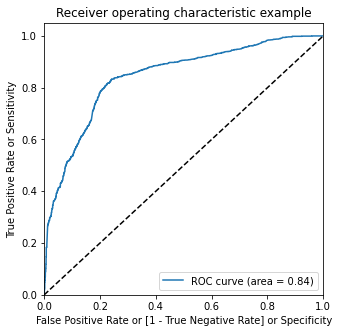

In [200]:
draw_roc(y_train_pred_final.Lead, y_train_pred_final.Lead_Prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [201]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
print(numbers)
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.870414         2121          1    1    1    1    1    1    1    1   
1     0   0.599138         7074          1    1    1    1    1    1    1    0   
2     0   0.229431         7252          0    1    1    1    0    0    0    0   
3     1   0.737018         2367          1    1    1    1    1    1    1    1   
4     0   0.567146         1197          1    1    1    1    1    1    1    0   

   0.7  0.8  0.9  
0    1    1    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [202]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.486505  1.000000  0.000000
0.1   0.1  0.540484  0.998578  0.106469
0.2   0.2  0.632180  0.939545  0.340970
0.3   0.3  0.765398  0.857752  0.677898
0.4   0.4  0.794464  0.817212  0.772911
0.5   0.5  0.785813  0.764580  0.805930
0.6   0.6  0.747751  0.640114  0.849730
0.7   0.7  0.721453  0.524893  0.907682
0.8   0.8  0.681315  0.393314  0.954178
0.9   0.9  0.639100  0.273115  0.985849


The **key takeaway** from this code is the accuracy, sensitivity, and specificity values which have been calculated using the appropriate elements in the confusion matrix. The code outputted the following above dataframe:

As you can see, when the probability thresholds are very low, the sensitivity is very high and specificity is very low. Similarly, for larger probability thresholds, the sensitivity values are very low but the specificity values are very high. And at about `0.4`, the three metrics seem to be almost equal with decent values.

Also since from business perspective working towards increasing sensitivity and decreasing `False Negatives`(That is Hot Leads who are wrongly predicted as cold leads is our objective and hence, we choose `0.4` as the optimal cut-off point. The following graph also showcases that at about `0.4`, the three metrics intersect.

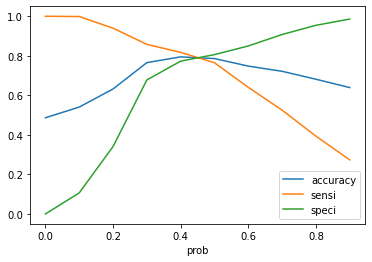

In [203]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, and from business perspective `0.4` is the optimum point to take it as a cutoff probability.

### New metrics when we change the cutoff from `0.5` to `0.4`

In [204]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Prob.map( lambda x: 1 if x > 0.4 else 0)
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Prob.map( lambda x: x*100)
y_train_pred_final.head()

Lead  Lead_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0     1   0.870414         2121          1    1    1    1    1    1    1    1   
1     0   0.599138         7074          1    1    1    1    1    1    1    0   
2     0   0.229431         7252          0    1    1    1    0    0    0    0   
3     1   0.737018         2367          1    1    1    1    1    1    1    1   
4     0   0.567146         1197          1    1    1    1    1    1    1    0   

   0.7  0.8  0.9  final_predicted  Lead_Score  
0    1    1    0                1   87.041434  
1    0    0    0                1   59.913798  
2    0    0    0                0   22.943058  
3    1    0    0                1   73.701805  
4    0    0    0                1   56.714612

In [205]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Lead, y_train_pred_final.final_predicted)

0.7944636678200692

In [206]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Lead, y_train_pred_final.final_predicted )
confusion2

array([[1147,  337],
       [ 257, 1149]], dtype=int64)

In [207]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

####  At `0.4` cut off ,sensitivity (% of correctly predicted Hot Leads)= 0.8172119487908962

In [208]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8172119487908962

####  specificity (% of correctly predicted Cold Leads)=0.772911051212938

In [209]:
# Let us calculate specificity
TN / float(TN+FP)

0.772911051212938

## Making predictions on the test set:


In [210]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [211]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  \
1493             0                    -0.525968   
8962             0                     2.119312   
5170             0                    -0.648221   
5321             0                    -0.727952   
2172             0                     0.319175   

      Dmy Lead Origin_Lead Add Form  Dmy Lead Source_Direct Traffic  \
1493                              0                               0   
8962                              0                               1   
5170                              0                               0   
5321                              0                               0   
2172                              0                               0   

      Dmy Lead Source_Google  Dmy Lead Source_Organic Search  \
1493                       1                               0   
8962                       0                               0   
5170                       1                               0   
5321                       1                               0   
2172                       1                               0   

      Dmy What is your current occupation_Working Professional  
1493                                                  0         
8962                                                  0         
5170                                                  0         
5321                                                  0         
2172                                                  0

In [212]:
X_test_sm = sm.add_constant(X_test)

In [213]:
y_test_pred = lor_model.predict(X_test_sm)

In [214]:
y_test_pred[:10]

1493    0.313536
8962    0.848677
5170    0.285522
5321    0.268085
2172    0.534918
2410    0.939592
8674    0.214718
3090    0.944421
149     0.379731
7742    0.335369
dtype: float64

In [215]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [216]:
# Let's see the head
y_pred_1.head()

0
1493  0.313536
8962  0.848677
5170  0.285522
5321  0.268085
2172  0.534918

In [217]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

Converted
1493          0
8962          1
5170          1
5321          0
2172          1

In [218]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [219]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [220]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [221]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         1493  0.313536
1          1         8962  0.848677
2          1         5170  0.285522
3          0         5321  0.268085
4          1         2172  0.534918

In [222]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Prob'})
y_pred_final.head()

Converted  Prospect ID  Lead_Prob
0          0         1493   0.313536
1          1         8962   0.848677
2          1         5170   0.285522
3          0         5321   0.268085
4          1         2172   0.534918

In [223]:
# Rearranging the columns
# y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis=1) #'DataFrame' object has no attribute 'reindex_axis'
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Prob'], axis=1)

In [224]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Lead_Prob
0         1493          0   0.313536
1         8962          1   0.848677
2         5170          1   0.285522
3         5321          0   0.268085
4         2172          1   0.534918

In [225]:
y_pred_final['Lead_Score'] = y_pred_final.Lead_Prob.map(lambda x: x*100)
y_pred_final['final_predicted'] = y_pred_final.Lead_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [226]:
y_pred_final.head()

Prospect ID  Converted  Lead_Prob  Lead_Score  final_predicted
0         1493          0   0.313536   31.353567                0
1         8962          1   0.848677   84.867698                1
2         5170          1   0.285522   28.552158                0
3         5321          0   0.268085   26.808472                0
4         2172          1   0.534918   53.491810                1

####  Let's check the overall accuracy of Test Data Set: 0.7917675544794189

In [227]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7917675544794189

In [228]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[474, 150],
       [108, 507]], dtype=int64)

In [229]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

#### Model evaluation on 'Test' Data with `0.4` as the cut off with "senstivity and specificty view":
#### Sensitivty of Test Set: 0.824390243902439

In [230]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.824390243902439

#### Specificity of Test Set: 0.7596153846153846

In [231]:
# Let us calculate specificity
TN / float(TN+FP)

0.7596153846153846

#### Inference:
Our Model is predicting the metrics well on test data set as well!

## Thats All Folks!!

### Thank you Upgrad and IITB For the Learning Experience!

# This Case Study Assignment was submitted by Achal Kagwad

#### Project Complete
- This Project is done by `Achal Kagwad`
- Contact no: +91-9108302174
- Email Id: achal.kagwad@gmail.com
- Linked in: https://www.linkedin.com/in/achalkagwad/

---